In [1]:
# сделаем необходимые импорты

# для формирования и взаимодействия с базой - sqlite3

# помощь в генерации данных:
# import names
# import datetime
# from random import * (random можно брать и из Numpy, но я делаю по старинке)

# работа с таблицами и графики
# import pandas as pd
# from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# !!! созданная здесь база будет использоваться в следующем проекте !!!

In [3]:
import sqlite3
import names
import datetime
from random import *

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# давайте сделаем еще одну базу, в которой будет 5 таблиц
# между ними будут выстроены связи
# более того, эта база будет использована в следующем проекте

# создадим базу и получим курсор

In [5]:
conn = sqlite3.connect('furniture_store+.db')
conn

In [6]:
cursor = conn.cursor()

In [7]:
# первая таблица в базе отвечает за перечень товаров, которые продаются в магазине/приложении

# ай ди продукта
# регистрационный номер
# бренд продукта
# категория продукта
# цена продукта

# эта таблица будет иметь связь со второй таблицей в части категории продукта
# в этой таблице только номер, в другой будет текстовое название категории продукта и его описание
# в этом поможет FOREIGN KEY

# внешние ключи позволяют установить связи между таблицами 
# внешний ключ устанавливается для столбцов из зависимой, подчиненной таблицы, 
# и указывает на один из столбцов из главной таблицы 
# как правило, внешний ключ указывает на первичный ключ из связанной главной таблицы

In [8]:
sql_code = """
CREATE TABLE IF NOT EXISTS products (
product_id INTEGER PRIMARY KEY,
reg_number INTEGER,
brand_name TEXT,
category_number INTEGER,
price DECIMAL(10, 2),
FOREIGN KEY(category_number) REFERENCES categories(category_number)
)
"""

In [9]:
# выполним sql код

In [10]:
cursor.execute(sql_code)

In [11]:
# создадим вторую таблицу, в которой будет категория, текстовое название категории продукта и его описание
# это можно было поместить и в первую таблицу, но я решил немного усложнить задачу

In [12]:
sql_code_2 = """
CREATE TABLE IF NOT EXISTS categories (
category_id INTEGER PRIMARY KEY,
category_number INTEGER,
category_name TEXT,
category_info TEXT
)
"""

In [13]:
# выполним sql код

In [14]:
cursor.execute(sql_code_2)

In [15]:
# таблица 3 - складские запасы

# ай ди, регистрационный номер и количество единиц на складе
# сделаем связь с первой таблицей

In [16]:
sql_code_3 = """
CREATE TABLE IF NOT EXISTS inventory (
inventory_id INTEGER PRIMARY KEY, 
reg_number INTEGER,
quantity INTEGER,
FOREIGN KEY(reg_number) REFERENCES products(reg_number)
)
"""

In [17]:
# выполним sql код

In [18]:
cursor.execute(sql_code_3)

In [19]:
# таблица 4 - покупатели/пользователи

# ай ди пользователя
# фамилия и имя пользователя
# возраст
# электронная почта
# персональный рейтинг

In [20]:
sql_code_4 = """
CREATE TABLE IF NOT EXISTS customers (
customer_id INTEGER PRIMARY KEY,
customer_number INTEGER,
customer_data VARCHAR,
age INTEGER,
email VARCHAR,
rating INTEGER
)
"""

In [21]:
# выполним sql код

In [22]:
cursor.execute(sql_code_4)

In [23]:
# таблица - информация про заказы в магазине/приложении

# ай ди заказа
# ай ди продукта
# ай ди пользователя
# дата покупки
# наличие/отсутствие доставки в заказе

# эта таблица будет иметь 2 связи - на таблицу с информацией про ассортимент и пользователей

In [24]:
sql_code_5 = """
CREATE TABLE IF NOT EXISTS orders (
id INTEGER PRIMARY KEY,
reg_number INTEGER,
customer_number INTEGER,
date_of_order DATETIME,
delivery BOOL,
FOREIGN KEY(reg_number) REFERENCES products(reg_number),
FOREIGN KEY(customer_number) REFERENCES customers(customer_number)
)
"""

In [25]:
# выполним sql код

In [26]:
cursor.execute(sql_code_5)

In [27]:
# подтвердим действия и временно закроем соединение с базой

In [28]:
conn.commit()
conn.close()

In [29]:
# давайте приступим к формированию данных для базы
# в этом проекте генерация данных происходит заранее

# начнем с products

In [30]:
# подготовим список с возможными брендами, остальное будет генерироваться случайным образом

In [31]:
brands = ['IKEA',
          'Ashley HomeStore',
          'Restoration Hardware',
          'Kartell',
          'Williams-Sonoma',
          'La-Z-Boy Furniture Galleries',
          'Raymour & Flanigan',
          'American Signature',
          'Простые вещи',
          'SKDESIGN',
          'Eburet',
          'Приличные диваны',
          'Pro Kresla',
          'Mishkin les']

In [32]:
# создадим переменную products_data
# основной принцип генерации данных - это цепочки кортежей

# в кортеже будет 4 элемента - reg_number, brand_name, category_id, price
# всего у нас будет 100 наименований товаров

# рег номер, для учёта
# случайный выбор брэнда - choice(brands)
# случайная категория (у нас их будет 5) - randint(1,5)
# случайная цена товара, дробное число, 2 цифры после запятой - round(uniform(200,1000),2)
# делаем 100 записей - for _ in range(100)

In [33]:
products_data = [(101 + i, choice(brands), randint(1, 5), round(uniform(200, 1000), 2)) for i in range (100)]
products_data

[(101, 'SKDESIGN', 5, 721.19),
 (102, 'La-Z-Boy Furniture Galleries', 4, 555.63),
 (103, 'Kartell', 5, 684.07),
 (104, 'Eburet', 4, 444.48),
 (105, 'Raymour & Flanigan', 3, 813.35),
 (106, 'Ashley HomeStore', 5, 752.98),
 (107, 'Restoration Hardware', 5, 825.26),
 (108, 'Mishkin les', 5, 761.74),
 (109, 'Williams-Sonoma', 5, 650.58),
 (110, 'Raymour & Flanigan', 2, 864.51),
 (111, 'Pro Kresla', 1, 557.6),
 (112, 'Kartell', 4, 491.59),
 (113, 'Kartell', 2, 428.31),
 (114, 'Williams-Sonoma', 2, 639.39),
 (115, 'SKDESIGN', 2, 781.59),
 (116, 'La-Z-Boy Furniture Galleries', 4, 693.98),
 (117, 'Eburet', 3, 920.77),
 (118, 'SKDESIGN', 5, 585.37),
 (119, 'Raymour & Flanigan', 2, 233.19),
 (120, 'Raymour & Flanigan', 3, 967.77),
 (121, 'Williams-Sonoma', 3, 543.13),
 (122, 'Простые вещи', 5, 750.55),
 (123, 'Kartell', 1, 942.42),
 (124, 'Приличные диваны', 2, 587.13),
 (125, 'Williams-Sonoma', 1, 718.39),
 (126, 'Приличные диваны', 4, 256.51),
 (127, 'Kartell', 5, 506.82),
 (128, 'Eburet', 5, 

In [34]:
# восстановим соединение с базой и получим курсор

In [35]:
conn = sqlite3.connect('furniture_store+.db')
conn

In [36]:
cursor = conn.cursor()

In [37]:
# в этом проекте заполнять данные будем через - executemany

# executemany - метод позволяет выполнить одну команду SQL для последовательности параметров (или для итератора)
# с помощью метода executemany можно добавить в таблицу аналогичный список данных одной командой
# он работает, если у нас уже есть необходимый список кортежей, а он у нас есть

# по сути, executemany заменяет цикл Фор, он некая альтернатива
# при условии, что данные уже готовы, например, они в одном массиве и структурированны

# указываем куда вставлять данные, VALUES = количество элементов и массив с подготовленными данными
# executemany сам перебрал массив и разместил данные в БД соответствующим образом

In [38]:
cursor.executemany('INSERT INTO products (reg_number, brand_name, category_number, price) VALUES (?, ?, ?, ?)', products_data)

In [39]:
# подтвердим действия

In [40]:
conn.commit()

In [41]:
# проверим таблицу через тестовый запрос
# всё работает

In [42]:
test_request = """
SELECT * FROM products;
"""

In [43]:
cursor.execute(test_request)

In [44]:
list(cursor.fetchall())

[(1, 101, 'SKDESIGN', 5, 721.19),
 (2, 102, 'La-Z-Boy Furniture Galleries', 4, 555.63),
 (3, 103, 'Kartell', 5, 684.07),
 (4, 104, 'Eburet', 4, 444.48),
 (5, 105, 'Raymour & Flanigan', 3, 813.35),
 (6, 106, 'Ashley HomeStore', 5, 752.98),
 (7, 107, 'Restoration Hardware', 5, 825.26),
 (8, 108, 'Mishkin les', 5, 761.74),
 (9, 109, 'Williams-Sonoma', 5, 650.58),
 (10, 110, 'Raymour & Flanigan', 2, 864.51),
 (11, 111, 'Pro Kresla', 1, 557.6),
 (12, 112, 'Kartell', 4, 491.59),
 (13, 113, 'Kartell', 2, 428.31),
 (14, 114, 'Williams-Sonoma', 2, 639.39),
 (15, 115, 'SKDESIGN', 2, 781.59),
 (16, 116, 'La-Z-Boy Furniture Galleries', 4, 693.98),
 (17, 117, 'Eburet', 3, 920.77),
 (18, 118, 'SKDESIGN', 5, 585.37),
 (19, 119, 'Raymour & Flanigan', 2, 233.19),
 (20, 120, 'Raymour & Flanigan', 3, 967.77),
 (21, 121, 'Williams-Sonoma', 3, 543.13),
 (22, 122, 'Простые вещи', 5, 750.55),
 (23, 123, 'Kartell', 1, 942.42),
 (24, 124, 'Приличные диваны', 2, 587.13),
 (25, 125, 'Williams-Sonoma', 1, 718.39)

In [45]:
# во второй таблице (categories) у нас 2 колонки

# создадим переменную category_info, в которую поместим описания видов мебели

In [46]:
category_info = ['предмет мебели, имеющий приподнятую горизонтальную или наклонную поверхность и предназначенный для размещения предметов, выполнения работ, принятия пищи, игр, рисования, обучения и другой деятельности',
                 'предмет мебели для сидения одного человека, с опорой для спины с подлокотниками или без них',
                 'мебельное изделие для хранения предметов различного функционального назначения',
                 'предмет мебели для комфортного продолжительного сидения, со спинкой, c подлокотниками или без них',
                 'предмет мебели, предназначенный для сна в положении лёжа, бывает прямоугольной или круглой формы']

In [47]:
# создадим переменную categories_data
# берем по элементу из массива

In [48]:
categories_data = [(n, c, i) for n, c, i in zip(range(1, 6), ['стол','стул','шкаф','кресло','кровать'], category_info)]
categories_data

[(1,
  'стол',
  'предмет мебели, имеющий приподнятую горизонтальную или наклонную поверхность и предназначенный для размещения предметов, выполнения работ, принятия пищи, игр, рисования, обучения и другой деятельности'),
 (2,
  'стул',
  'предмет мебели для сидения одного человека, с опорой для спины с подлокотниками или без них'),
 (3,
  'шкаф',
  'мебельное изделие для хранения предметов различного функционального назначения'),
 (4,
  'кресло',
  'предмет мебели для комфортного продолжительного сидения, со спинкой, c подлокотниками или без них'),
 (5,
  'кровать',
  'предмет мебели, предназначенный для сна в положении лёжа, бывает прямоугольной или круглой формы')]

In [49]:
# отправляем данные в БД и сохраняем результат

In [50]:
cursor.executemany('INSERT INTO categories (category_number, category_name, category_info) VALUES (?, ?, ?)', categories_data)

In [51]:
conn.commit()

In [52]:
# тестовый запрос

In [53]:
test_request = """
SELECT * FROM categories;
"""

In [54]:
cursor.execute(test_request)

In [55]:
list(cursor.fetchall())

[(1,
  1,
  'стол',
  'предмет мебели, имеющий приподнятую горизонтальную или наклонную поверхность и предназначенный для размещения предметов, выполнения работ, принятия пищи, игр, рисования, обучения и другой деятельности'),
 (2,
  2,
  'стул',
  'предмет мебели для сидения одного человека, с опорой для спины с подлокотниками или без них'),
 (3,
  3,
  'шкаф',
  'мебельное изделие для хранения предметов различного функционального назначения'),
 (4,
  4,
  'кресло',
  'предмет мебели для комфортного продолжительного сидения, со спинкой, c подлокотниками или без них'),
 (5,
  5,
  'кровать',
  'предмет мебели, предназначенный для сна в положении лёжа, бывает прямоугольной или круглой формы')]

In [56]:
# переходим к складским запасам

# создадим переменную inventory_data, в которой будут колонки для третьей таблицы, их там 2 - reg_number, quantity

# product_id - число от 1 до 100, именно столько у нас наименований товаров
# количество товара - случайное число от 0 до 30
# кол-во записей 100 - for i in range(100)

In [57]:
inventory_data = [(i, randint(0, 30)) for i in range(101, 201)]

In [58]:
# используем executemany

In [59]:
cursor.executemany('INSERT INTO inventory (reg_number, quantity) VALUES (?, ?)', inventory_data)

In [60]:
conn.commit()

In [61]:
# тестовый запрос

In [62]:
test_request = """
SELECT * FROM inventory;
"""

In [63]:
cursor.execute(test_request)

In [64]:
list(cursor.fetchall())

[(1, 101, 16),
 (2, 102, 19),
 (3, 103, 9),
 (4, 104, 7),
 (5, 105, 16),
 (6, 106, 12),
 (7, 107, 21),
 (8, 108, 23),
 (9, 109, 14),
 (10, 110, 10),
 (11, 111, 1),
 (12, 112, 24),
 (13, 113, 6),
 (14, 114, 11),
 (15, 115, 5),
 (16, 116, 1),
 (17, 117, 19),
 (18, 118, 10),
 (19, 119, 10),
 (20, 120, 5),
 (21, 121, 13),
 (22, 122, 16),
 (23, 123, 20),
 (24, 124, 23),
 (25, 125, 27),
 (26, 126, 3),
 (27, 127, 22),
 (28, 128, 18),
 (29, 129, 16),
 (30, 130, 19),
 (31, 131, 26),
 (32, 132, 24),
 (33, 133, 16),
 (34, 134, 22),
 (35, 135, 20),
 (36, 136, 16),
 (37, 137, 7),
 (38, 138, 7),
 (39, 139, 1),
 (40, 140, 23),
 (41, 141, 6),
 (42, 142, 4),
 (43, 143, 18),
 (44, 144, 11),
 (45, 145, 10),
 (46, 146, 13),
 (47, 147, 25),
 (48, 148, 13),
 (49, 149, 10),
 (50, 150, 18),
 (51, 151, 17),
 (52, 152, 16),
 (53, 153, 14),
 (54, 154, 29),
 (55, 155, 6),
 (56, 156, 3),
 (57, 157, 9),
 (58, 158, 0),
 (59, 159, 1),
 (60, 160, 15),
 (61, 161, 2),
 (62, 162, 20),
 (63, 163, 13),
 (64, 164, 21),
 (65

In [65]:
# переходим к четвертой таблице, где будут данные про покупателей/пользователей

# первым делом я сгенерирую список на 80 имен и фамилий
# именно столько у нас будет покупателей/пользователей

In [66]:
name = [names.get_full_name() for _ in range(80)]
name

['Robert Jenkins',
 'Susan Mercer',
 'Linda Tran',
 'Rodney Velasquez',
 'Michelle Jones',
 'Teresa Shearer',
 'Jaime Salvemini',
 'Jackie Aldana',
 'Odis Curran',
 'Kenneth Hahn',
 'Samuel Desjardins',
 'Joseph Meskill',
 'Wallace Reilly',
 'Christopher Wren',
 'Norma Whitaker',
 'Leticia Olsen',
 'Fannie Phillips',
 'Maria Roe',
 'Thomas Haynes',
 'Margaret Dunn',
 'Connie Mull',
 'Richard Lapierre',
 'Maurice Walsh',
 'Kizzy Rapp',
 'Laura Casey',
 'Dean Steib',
 'Alan Harding',
 'George Zajac',
 'Laura Watson',
 'Charles Felton',
 'Sandra Purpura',
 'Robert Holtgrewe',
 'Jeremy Pullen',
 'Alejandro Hamilton',
 'Christopher Andrews',
 'Jeremiah Polczynski',
 'Lillian Mellish',
 'Olive Burwood',
 'Debra Jenkins',
 'Samuel Tuck',
 'Edna Messenger',
 'Tod Neal',
 'Alicia Soliman',
 'Peter Wolfrom',
 'Lesley Fisher',
 'Krystle Jackson',
 'Shonda Carter',
 'Sarah Lucas',
 'Sandra Barron',
 'Stephen Clark',
 'Samuel Hoggins',
 'Laura Cordova',
 'Stephanie Isenhart',
 'David Menn',
 'Edwar

In [67]:
# для создания электронных почт, нам потребуются доп данные
# создам список host с 6-ю почтовыми службами

In [68]:
host = ['@gmail.com','@mail.ru','@yandex.ru','@live.com','@yahoo.com','@fastmail.com']
host

['@gmail.com',
 '@mail.ru',
 '@yandex.ru',
 '@live.com',
 '@yahoo.com',
 '@fastmail.com']

In [69]:
# переходим к непосредственной генерации

# номер пользователя, имя, возраст (18 - 100 лет), адрес электронной почты и рейтиг (от 0 до 5, точность до десятых)
# принцип генерации почты - берем имя и фамилию, пробел заменяем на нижнее подчеркивание и добавляем случайный хост

In [70]:
customers_data = [(e + 1, 
                   i,
                   randint(18, 100),
                   i.replace(' ','_') + choice(host),
                   round(uniform(0,5), 1)) for e, i in enumerate(name)]
customers_data

[(1, 'Robert Jenkins', 77, 'Robert_Jenkins@live.com', 4.6),
 (2, 'Susan Mercer', 66, 'Susan_Mercer@live.com', 2.9),
 (3, 'Linda Tran', 70, 'Linda_Tran@yahoo.com', 4.3),
 (4, 'Rodney Velasquez', 23, 'Rodney_Velasquez@mail.ru', 1.2),
 (5, 'Michelle Jones', 49, 'Michelle_Jones@yandex.ru', 3.7),
 (6, 'Teresa Shearer', 85, 'Teresa_Shearer@mail.ru', 0.3),
 (7, 'Jaime Salvemini', 34, 'Jaime_Salvemini@fastmail.com', 2.4),
 (8, 'Jackie Aldana', 64, 'Jackie_Aldana@live.com', 0.5),
 (9, 'Odis Curran', 36, 'Odis_Curran@yahoo.com', 1.7),
 (10, 'Kenneth Hahn', 99, 'Kenneth_Hahn@gmail.com', 0.8),
 (11, 'Samuel Desjardins', 76, 'Samuel_Desjardins@yandex.ru', 0.2),
 (12, 'Joseph Meskill', 31, 'Joseph_Meskill@fastmail.com', 2.5),
 (13, 'Wallace Reilly', 44, 'Wallace_Reilly@mail.ru', 1.6),
 (14, 'Christopher Wren', 75, 'Christopher_Wren@fastmail.com', 3.6),
 (15, 'Norma Whitaker', 71, 'Norma_Whitaker@mail.ru', 1.8),
 (16, 'Leticia Olsen', 90, 'Leticia_Olsen@fastmail.com', 3.5),
 (17, 'Fannie Phillips', 3

In [71]:
cursor.executemany('INSERT INTO customers (customer_number, customer_data, age, email, rating) VALUES (?, ?, ?, ?, ?)', customers_data)

In [72]:
conn.commit()

In [73]:
# тестовый запрос

In [74]:
test_request = """
SELECT * FROM customers;
"""

In [75]:
cursor.execute(test_request)

In [76]:
list(cursor.fetchall())

[(1, 1, 'Robert Jenkins', 77, 'Robert_Jenkins@live.com', 4.6),
 (2, 2, 'Susan Mercer', 66, 'Susan_Mercer@live.com', 2.9),
 (3, 3, 'Linda Tran', 70, 'Linda_Tran@yahoo.com', 4.3),
 (4, 4, 'Rodney Velasquez', 23, 'Rodney_Velasquez@mail.ru', 1.2),
 (5, 5, 'Michelle Jones', 49, 'Michelle_Jones@yandex.ru', 3.7),
 (6, 6, 'Teresa Shearer', 85, 'Teresa_Shearer@mail.ru', 0.3),
 (7, 7, 'Jaime Salvemini', 34, 'Jaime_Salvemini@fastmail.com', 2.4),
 (8, 8, 'Jackie Aldana', 64, 'Jackie_Aldana@live.com', 0.5),
 (9, 9, 'Odis Curran', 36, 'Odis_Curran@yahoo.com', 1.7),
 (10, 10, 'Kenneth Hahn', 99, 'Kenneth_Hahn@gmail.com', 0.8),
 (11, 11, 'Samuel Desjardins', 76, 'Samuel_Desjardins@yandex.ru', 0.2),
 (12, 12, 'Joseph Meskill', 31, 'Joseph_Meskill@fastmail.com', 2.5),
 (13, 13, 'Wallace Reilly', 44, 'Wallace_Reilly@mail.ru', 1.6),
 (14, 14, 'Christopher Wren', 75, 'Christopher_Wren@fastmail.com', 3.6),
 (15, 15, 'Norma Whitaker', 71, 'Norma_Whitaker@mail.ru', 1.8),
 (16, 16, 'Leticia Olsen', 90, 'Letici

In [77]:
# переходим к формаванию таблицы с заказами

# здесь все данные будут генерироваться случайно
# таблица на 10 000 записей:
# случайный товар
# случайный пользователь
# случайная дата покупки в диапазоне 2020 - 2024
# наличие или отсутсвие услуги по доставке в виде булевых данных

In [78]:
orders_data = [(randint(101,200),
                randint(1,80), 
                datetime.datetime(2020,1,1) + datetime.timedelta(days = randint(0,1460),seconds = randint(0, 86400)), 
                choice([True,False])) for _ in range(100000)]

In [79]:
# выполним и подтвердим

In [80]:
cursor.executemany('INSERT INTO orders (reg_number, customer_number, date_of_order, delivery) VALUES (?, ?, ?, ?)', orders_data)

In [81]:
conn.commit()

In [82]:
# тестовый запрос

In [83]:
test_request = """
SELECT * FROM orders;
"""

In [84]:
cursor.execute(test_request)

In [85]:
list(cursor.fetchall())

[(1, 172, 34, '2020-07-21 02:06:23', 0),
 (2, 123, 38, '2022-11-27 04:03:19', 0),
 (3, 169, 63, '2021-09-08 08:34:54', 1),
 (4, 135, 66, '2022-09-20 16:53:22', 0),
 (5, 176, 37, '2022-03-25 00:52:44', 0),
 (6, 178, 8, '2021-04-25 13:55:57', 1),
 (7, 170, 52, '2020-12-22 08:53:39', 1),
 (8, 115, 18, '2020-05-04 17:14:15', 0),
 (9, 187, 9, '2022-02-09 16:44:54', 0),
 (10, 166, 6, '2020-05-12 06:28:53', 1),
 (11, 177, 52, '2021-04-04 22:18:45', 1),
 (12, 190, 56, '2022-10-08 21:09:57', 1),
 (13, 114, 55, '2020-06-25 03:16:51', 1),
 (14, 183, 42, '2022-03-16 12:23:40', 1),
 (15, 149, 72, '2020-04-24 20:57:43', 1),
 (16, 123, 79, '2021-01-24 19:25:17', 0),
 (17, 143, 7, '2022-11-18 09:04:08', 0),
 (18, 126, 11, '2021-11-20 20:50:23', 0),
 (19, 169, 59, '2020-03-07 20:06:29', 0),
 (20, 125, 48, '2020-01-13 09:34:46', 1),
 (21, 142, 61, '2020-02-02 01:38:30', 0),
 (22, 159, 29, '2023-02-04 04:22:11', 0),
 (23, 127, 59, '2023-11-12 20:54:35', 1),
 (24, 115, 71, '2020-04-26 02:45:05', 1),
 (25,

In [86]:
conn.close()

In [87]:
# восстановим соединение и получим курсор

In [88]:
conn = sqlite3.connect('furniture_store+.db')
conn

In [89]:
cursor = conn.cursor()

In [90]:
# сделаем запрос из двух таблиц

In [91]:
sql_request_1 = """
SELECT 
products.reg_number, 
products.brand_name, 
products.price, 
categories.category_number, 
categories.category_name, 
categories.category_info 
FROM products
LEFT JOIN categories ON products.category_number = categories.category_number
"""

In [92]:
cursor.execute(sql_request_1)

In [93]:
# сделаем ДФ по ассортименту и доп информации по товарам

In [94]:
sql_df_1 = pd.DataFrame(cursor.fetchall(), columns = ['reg_number', 
                                                      'brand_name', 
                                                      'price', 
                                                      'category_number', 
                                                      'category_name', 
                                                      'category_info'])

In [95]:
sql_df_1

,reg_number,brand_name,price,category_number,category_name,category_info
0,101,SKDESIGN,721.19,5,кровать,"предмет мебели, предназначенный для сна в поло..."
1,102,La-Z-Boy Furniture Galleries,555.63,4,кресло,предмет мебели для комфортного продолжительног...
2,103,Kartell,684.07,5,кровать,"предмет мебели, предназначенный для сна в поло..."
3,104,Eburet,444.48,4,кресло,предмет мебели для комфортного продолжительног...
4,105,Raymour & Flanigan,813.35,3,шкаф,мебельное изделие для хранения предметов разли...
...,...,...,...,...,...,...
95,196,Приличные диваны,935.68,4,кресло,предмет мебели для комфортного продолжительног...
96,197,Простые вещи,834.05,4,кресло,предмет мебели для комфортного продолжительног...
97,198,Restoration Hardware,481.67,3,шкаф,мебельное изделие для хранения предметов разли...
98,199,Kartell,383.67,3,шкаф,мебельное изделие для хранения предметов разли...


In [96]:
# посмотрим на 10 по дороговизне и дешевизне товаров через таблицы и графики

In [97]:
large = sql_df_1.nlargest(10, columns=['price']).reset_index(drop= True)
large

,reg_number,brand_name,price,category_number,category_name,category_info
0,167,SKDESIGN,993.78,3,шкаф,мебельное изделие для хранения предметов разли...
1,152,La-Z-Boy Furniture Galleries,986.45,1,стол,"предмет мебели, имеющий приподнятую горизонтал..."
2,156,Приличные диваны,979.56,4,кресло,предмет мебели для комфортного продолжительног...
3,120,Raymour & Flanigan,967.77,3,шкаф,мебельное изделие для хранения предметов разли...
4,169,IKEA,965.83,1,стол,"предмет мебели, имеющий приподнятую горизонтал..."
5,166,American Signature,945.92,2,стул,"предмет мебели для сидения одного человека, с ..."
6,132,Приличные диваны,942.45,2,стул,"предмет мебели для сидения одного человека, с ..."
7,123,Kartell,942.42,1,стол,"предмет мебели, имеющий приподнятую горизонтал..."
8,196,Приличные диваны,935.68,4,кресло,предмет мебели для комфортного продолжительног...
9,117,Eburet,920.77,3,шкаф,мебельное изделие для хранения предметов разли...


In [98]:
small = sql_df_1.nsmallest(10, columns=['price']).reset_index(drop= True)
small

,reg_number,brand_name,price,category_number,category_name,category_info
0,155,IKEA,218.63,2,стул,"предмет мебели для сидения одного человека, с ..."
1,119,Raymour & Flanigan,233.19,2,стул,"предмет мебели для сидения одного человека, с ..."
2,185,Restoration Hardware,240.53,1,стол,"предмет мебели, имеющий приподнятую горизонтал..."
3,151,Williams-Sonoma,250.64,5,кровать,"предмет мебели, предназначенный для сна в поло..."
4,160,Raymour & Flanigan,250.65,4,кресло,предмет мебели для комфортного продолжительног...
5,126,Приличные диваны,256.51,4,кресло,предмет мебели для комфортного продолжительног...
6,158,Williams-Sonoma,265.47,4,кресло,предмет мебели для комфортного продолжительног...
7,135,Pro Kresla,270.37,5,кровать,"предмет мебели, предназначенный для сна в поло..."
8,134,Kartell,274.60,4,кресло,предмет мебели для комфортного продолжительног...
9,164,American Signature,304.58,2,стул,"предмет мебели для сидения одного человека, с ..."


[Text(0, 0, 'шкаф'),
 Text(0, 1, 'стол'),
 Text(0, 2, 'кресло'),
 Text(0, 3, 'шкаф'),
 Text(0, 4, 'стол'),
 Text(0, 5, 'стул'),
 Text(0, 6, 'стул'),
 Text(0, 7, 'стол'),
 Text(0, 8, 'кресло'),
 Text(0, 9, 'шкаф')]

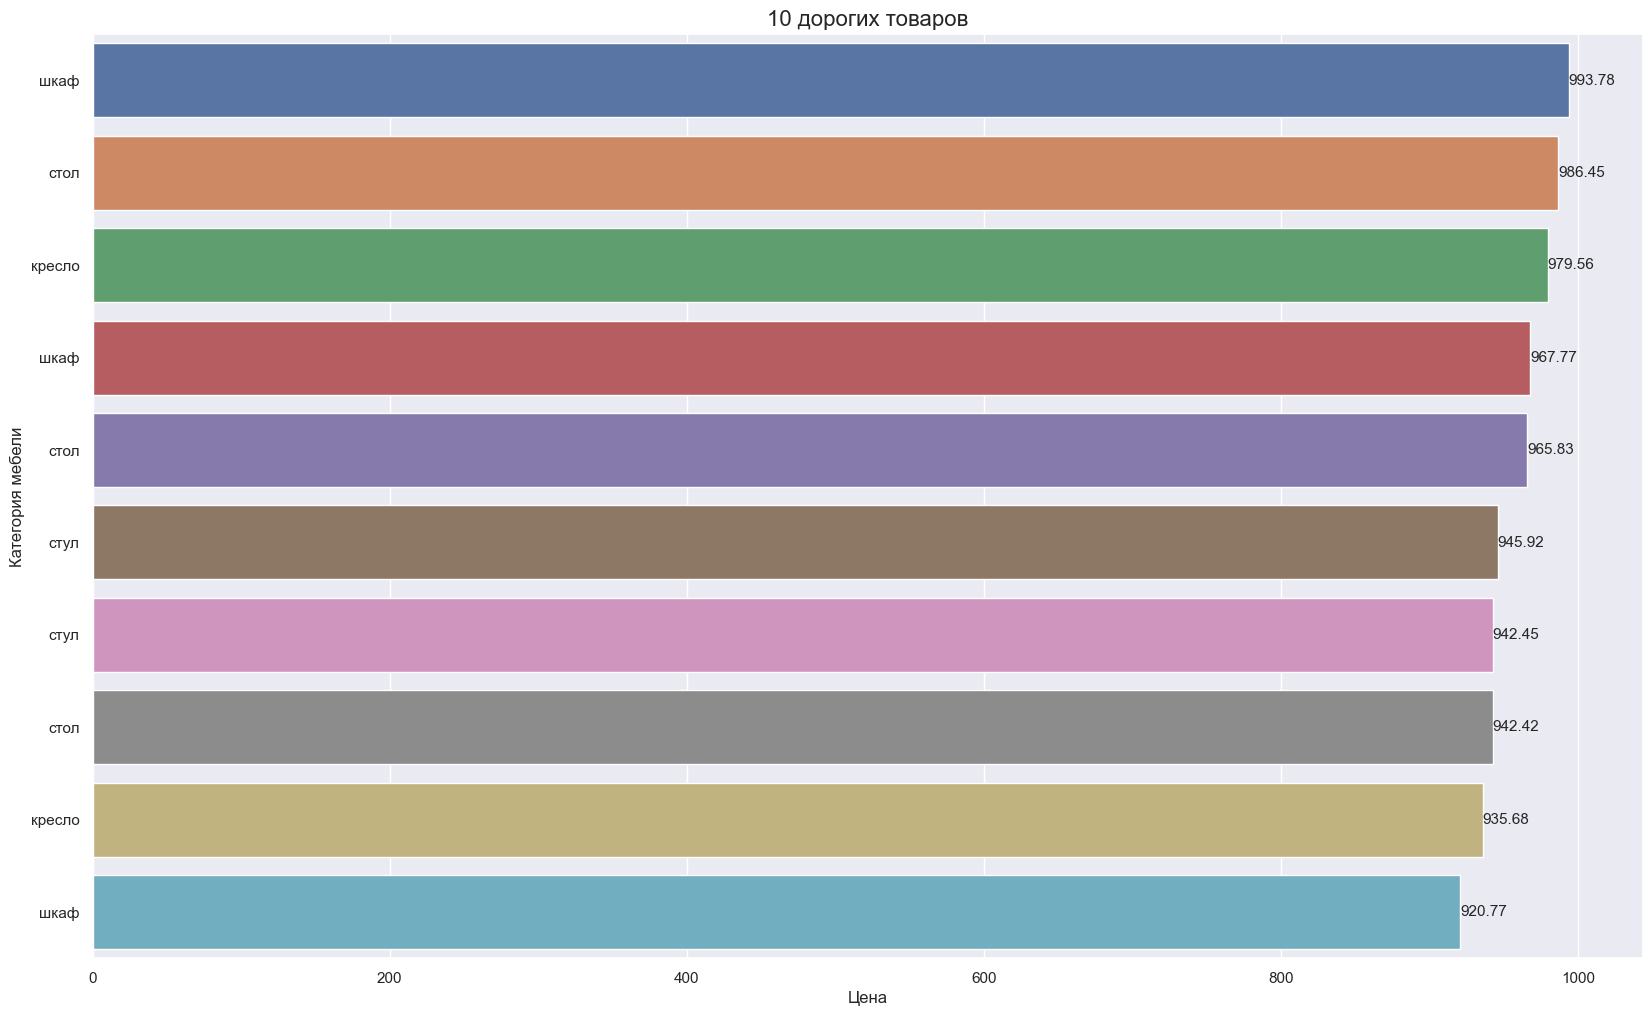

In [99]:
sns.set(rc={'figure.figsize':(20, 12)})

ax = sns.barplot(large, x = 'price', 
                 y = 'reg_number', 
                 orient = 'h', 
                 order = large.sort_values('price',ascending = False)['reg_number'])

ax.bar_label(ax.containers[0], size = 11)

plt.title('10 дорогих товаров', size = 16)
plt.xlabel('Цена')
plt.ylabel('Категория мебели')

ax.set_yticklabels([i for i in large['category_name']])

[Text(0, 0, 'стул'),
 Text(0, 1, 'стул'),
 Text(0, 2, 'стол'),
 Text(0, 3, 'кровать'),
 Text(0, 4, 'кресло'),
 Text(0, 5, 'кресло'),
 Text(0, 6, 'кресло'),
 Text(0, 7, 'кровать'),
 Text(0, 8, 'кресло'),
 Text(0, 9, 'стул')]

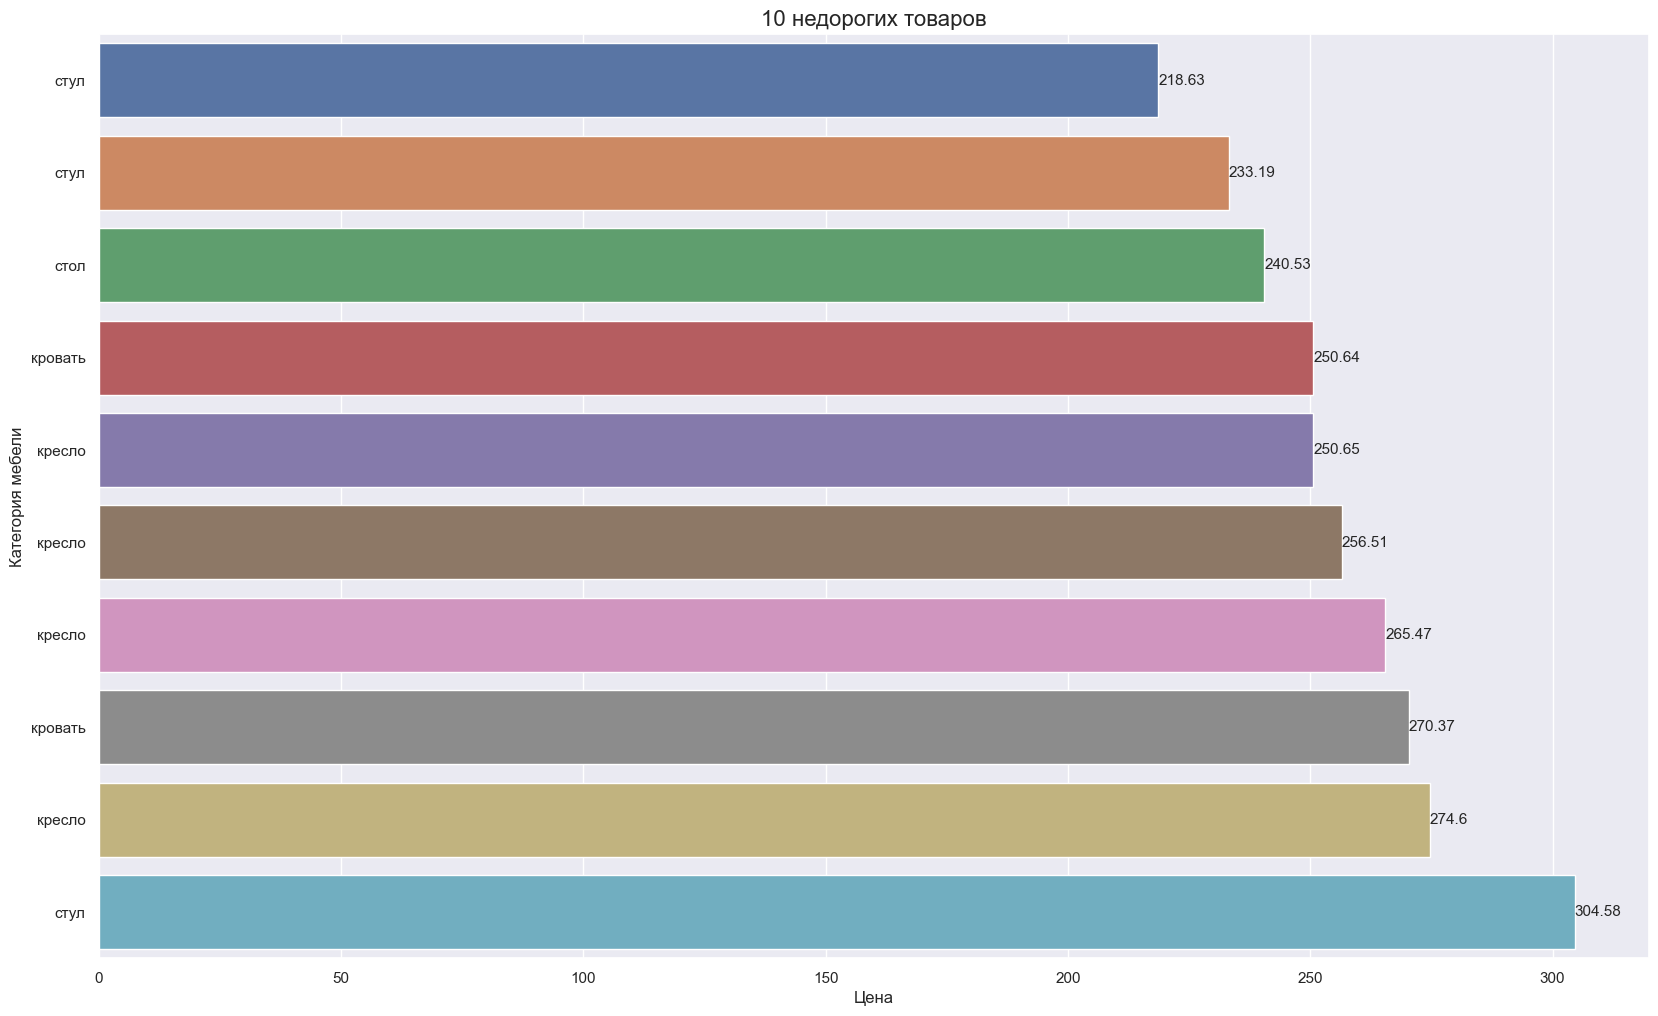

In [100]:
sns.set(rc={'figure.figsize':(20, 12)})

ax = sns.barplot(small, 
                 x = 'price', 
                 y = 'reg_number', 
                 orient = 'h',
                 order = small.sort_values('price')['reg_number'])

ax.bar_label(ax.containers[0], size = 11)

plt.title('10 недорогих товаров', size = 16)
plt.xlabel('Цена')
plt.ylabel('Категория мебели')

ax.set_yticklabels([i for i in small['category_name']])

In [101]:
# посмотрим на стоимость товаров по брендам

In [102]:
brand_name_group = sql_df_1.groupby('brand_name')['price'].sum().to_frame().sort_values('price', ascending=False)
brand_name_group

,price
brand_name,
Raymour & Flanigan,6428.08
Приличные диваны,6334.77
Kartell,5478.85
Williams-Sonoma,5385.58
Eburet,5352.67
IKEA,5206.69
Restoration Hardware,5056.43
SKDESIGN,4918.23
American Signature,4824.36


Text(0, 0.5, 'Бренд')

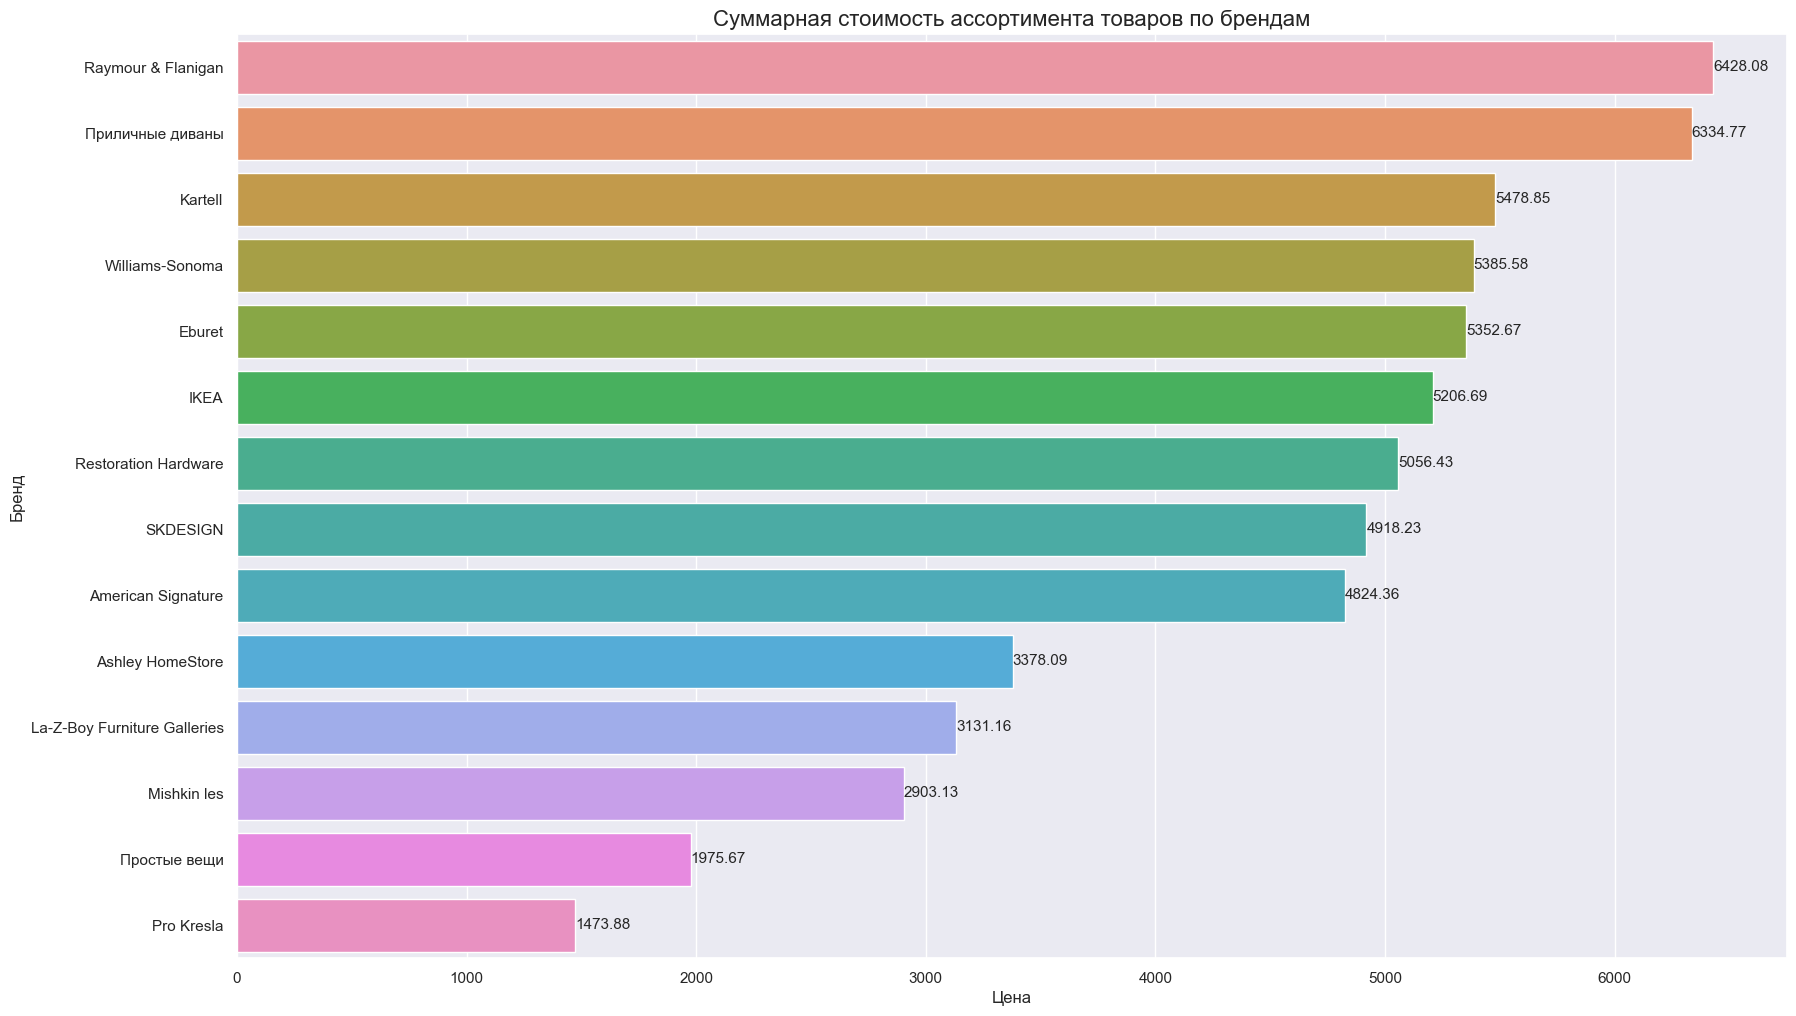

In [103]:
sns.set(rc={'figure.figsize':(20, 12)})

ax = sns.barplot(brand_name_group, 
                 x = 'price', 
                 y = brand_name_group.index, 
                 orient = 'h')

ax.bar_label(ax.containers[0], size = 11)

plt.title('Суммарная стоимость ассортимента товаров по брендам', size = 16)
plt.xlabel('Цена')
plt.ylabel('Бренд')

In [104]:
# посмотрим на стоимость товаров по категориям

In [105]:
category_name_group = sql_df_1.groupby('category_name')['price'].sum().to_frame().sort_values('price', ascending=False)
category_name_group

,price
category_name,
кресло,14881.78
кровать,12652.44
стол,12437.21
стул,11515.14
шкаф,10361.02


Text(0, 0.5, 'Цена')

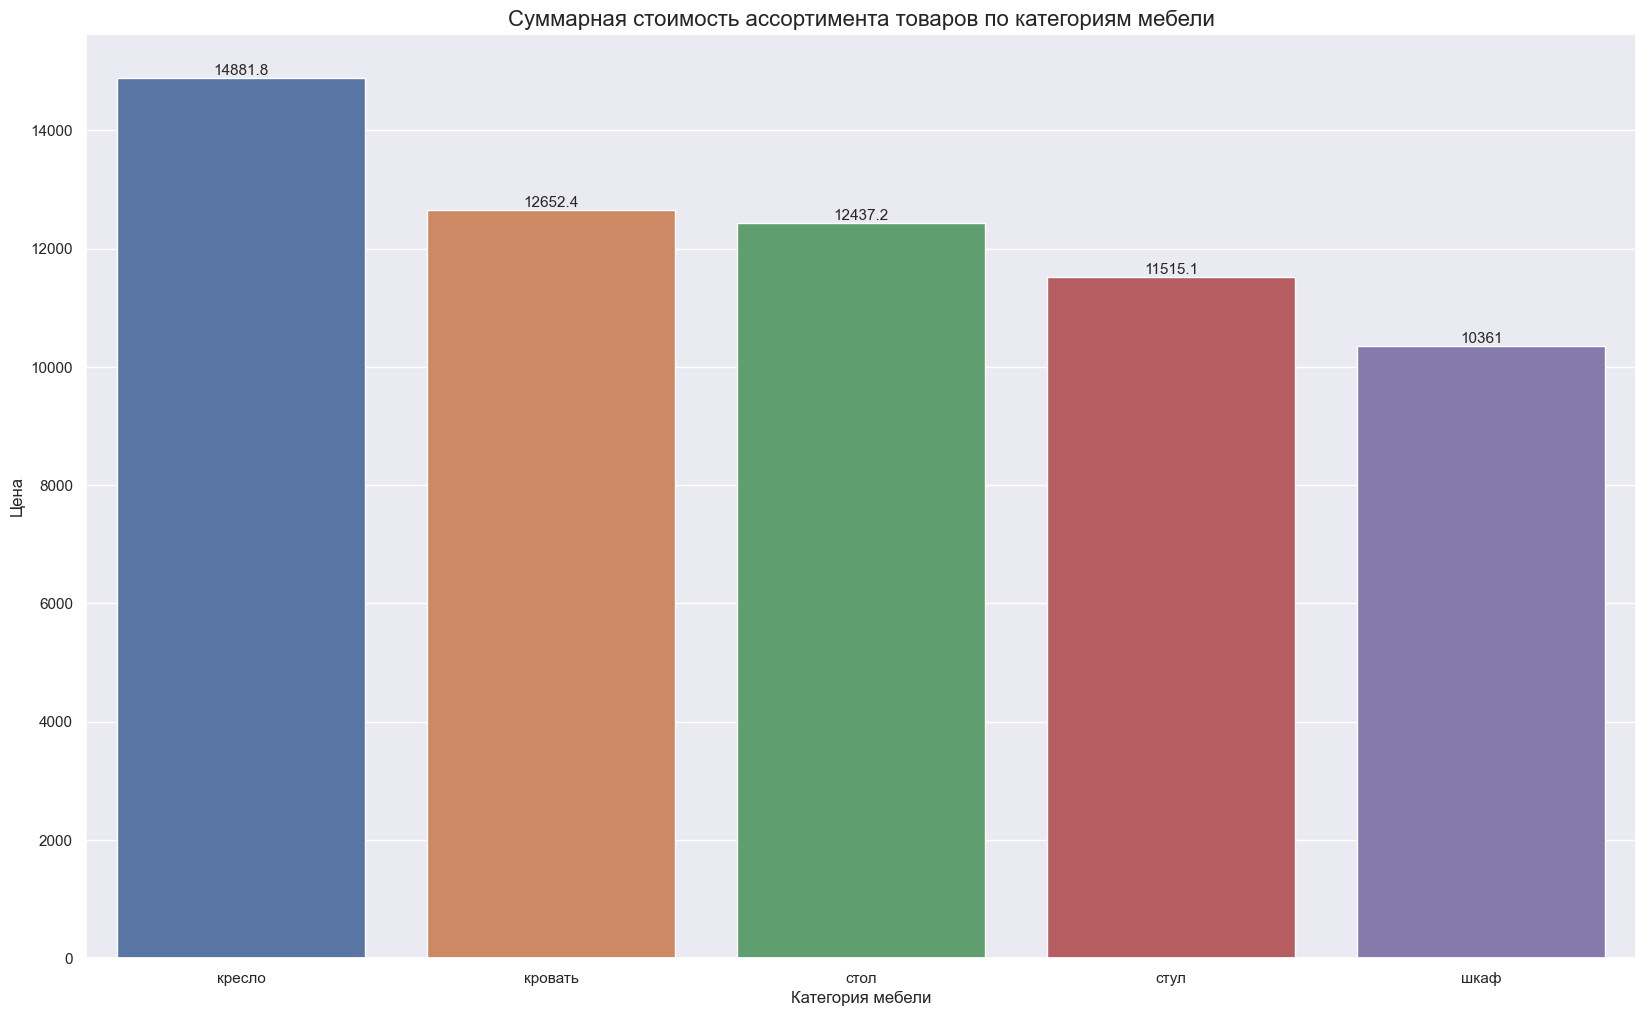

In [106]:
sns.set(rc={'figure.figsize':(20, 12)})

ax = sns.barplot(category_name_group, 
                 x = category_name_group.index, 
                 y = 'price')

ax.bar_label(ax.containers[0], size = 11)

plt.title('Суммарная стоимость ассортимента товаров по категориям мебели', size = 16)
plt.xlabel('Категория мебели')
plt.ylabel('Цена')

In [107]:
# сделаем запрос из трех таблиц

In [108]:
sql_request_2 = """
SELECT 
inventory.reg_number, 
products.brand_name, 
categories.category_number, 
categories.category_name, 
categories.category_info, 
products.price, 
inventory.quantity 
FROM inventory
LEFT JOIN products ON inventory.reg_number = products.reg_number
LEFT JOIN categories ON products.category_number = categories.category_number;
"""

In [109]:
cursor.execute(sql_request_2)

In [110]:
# постороим ДФ по складским данным

In [111]:
sql_df_2 = pd.DataFrame(cursor.fetchall(), columns = ['reg_number', 
                                                      'brand_name', 
                                                      'category_number', 
                                                      'category_name', 
                                                      'category_info', 
                                                      'price', 
                                                      'quantity'])

In [112]:
sql_df_2

,reg_number,brand_name,category_number,category_name,category_info,price,quantity
0,101,SKDESIGN,5,кровать,"предмет мебели, предназначенный для сна в поло...",721.19,16
1,102,La-Z-Boy Furniture Galleries,4,кресло,предмет мебели для комфортного продолжительног...,555.63,19
2,103,Kartell,5,кровать,"предмет мебели, предназначенный для сна в поло...",684.07,9
3,104,Eburet,4,кресло,предмет мебели для комфортного продолжительног...,444.48,7
4,105,Raymour & Flanigan,3,шкаф,мебельное изделие для хранения предметов разли...,813.35,16
...,...,...,...,...,...,...,...
95,196,Приличные диваны,4,кресло,предмет мебели для комфортного продолжительног...,935.68,26
96,197,Простые вещи,4,кресло,предмет мебели для комфортного продолжительног...,834.05,15
97,198,Restoration Hardware,3,шкаф,мебельное изделие для хранения предметов разли...,481.67,5
98,199,Kartell,3,шкаф,мебельное изделие для хранения предметов разли...,383.67,6


In [113]:
# добавим колонку с суммарной стоимостью складских запасов по каждому товару

In [114]:
sql_df_2['quantity_in_dollars'] = sql_df_2['price'] * sql_df_2['quantity']

In [115]:
sql_df_2

,reg_number,brand_name,category_number,category_name,category_info,price,quantity,quantity_in_dollars
0,101,SKDESIGN,5,кровать,"предмет мебели, предназначенный для сна в поло...",721.19,16,11539.04
1,102,La-Z-Boy Furniture Galleries,4,кресло,предмет мебели для комфортного продолжительног...,555.63,19,10556.97
2,103,Kartell,5,кровать,"предмет мебели, предназначенный для сна в поло...",684.07,9,6156.63
3,104,Eburet,4,кресло,предмет мебели для комфортного продолжительног...,444.48,7,3111.36
4,105,Raymour & Flanigan,3,шкаф,мебельное изделие для хранения предметов разли...,813.35,16,13013.60
...,...,...,...,...,...,...,...,...
95,196,Приличные диваны,4,кресло,предмет мебели для комфортного продолжительног...,935.68,26,24327.68
96,197,Простые вещи,4,кресло,предмет мебели для комфортного продолжительног...,834.05,15,12510.75
97,198,Restoration Hardware,3,шкаф,мебельное изделие для хранения предметов разли...,481.67,5,2408.35
98,199,Kartell,3,шкаф,мебельное изделие для хранения предметов разли...,383.67,6,2302.02


In [116]:
# посмотрим на складские запасы по каждому товару в единицах

In [117]:
quantity_group = sql_df_2[['reg_number','brand_name', 'category_name', 'quantity']].sort_values('quantity', ascending=False).reset_index(drop= True)
quantity_group

,reg_number,brand_name,category_name,quantity
0,189,Mishkin les,кровать,30
1,154,Eburet,стол,29
2,182,Kartell,шкаф,28
3,125,Williams-Sonoma,стол,27
4,171,American Signature,кресло,27
...,...,...,...,...
95,116,La-Z-Boy Furniture Galleries,кресло,1
96,111,Pro Kresla,стол,1
97,167,SKDESIGN,шкаф,1
98,185,Restoration Hardware,стол,0


[Text(0, 0, '189, Mishkin les, кровать'),
 Text(0, 1, '154, Eburet, стол'),
 Text(0, 2, '182, Kartell, шкаф'),
 Text(0, 3, '125, Williams-Sonoma, стол'),
 Text(0, 4, '171, American Signature, кресло'),
 Text(0, 5, '131, Простые вещи, шкаф'),
 Text(0, 6, '196, Приличные диваны, кресло'),
 Text(0, 7, '188, Raymour & Flanigan, стул'),
 Text(0, 8, '147, Ashley HomeStore, кровать'),
 Text(0, 9, '132, Приличные диваны, стул'),
 Text(0, 10, '112, Kartell, кресло'),
 Text(0, 11, '140, Приличные диваны, стол'),
 Text(0, 12, '124, Приличные диваны, стул'),
 Text(0, 13, '108, Mishkin les, кровать'),
 Text(0, 14, '180, Williams-Sonoma, стул'),
 Text(0, 15, '127, Kartell, кровать'),
 Text(0, 16, '134, Kartell, кресло'),
 Text(0, 17, '107, Restoration Hardware, кровать'),
 Text(0, 18, '193, Приличные диваны, шкаф'),
 Text(0, 19, '164, American Signature, стул'),
 Text(0, 20, '123, Kartell, стол'),
 Text(0, 21, '135, Pro Kresla, кровать'),
 Text(0, 22, '162, Raymour & Flanigan, стол'),
 Text(0, 23, '

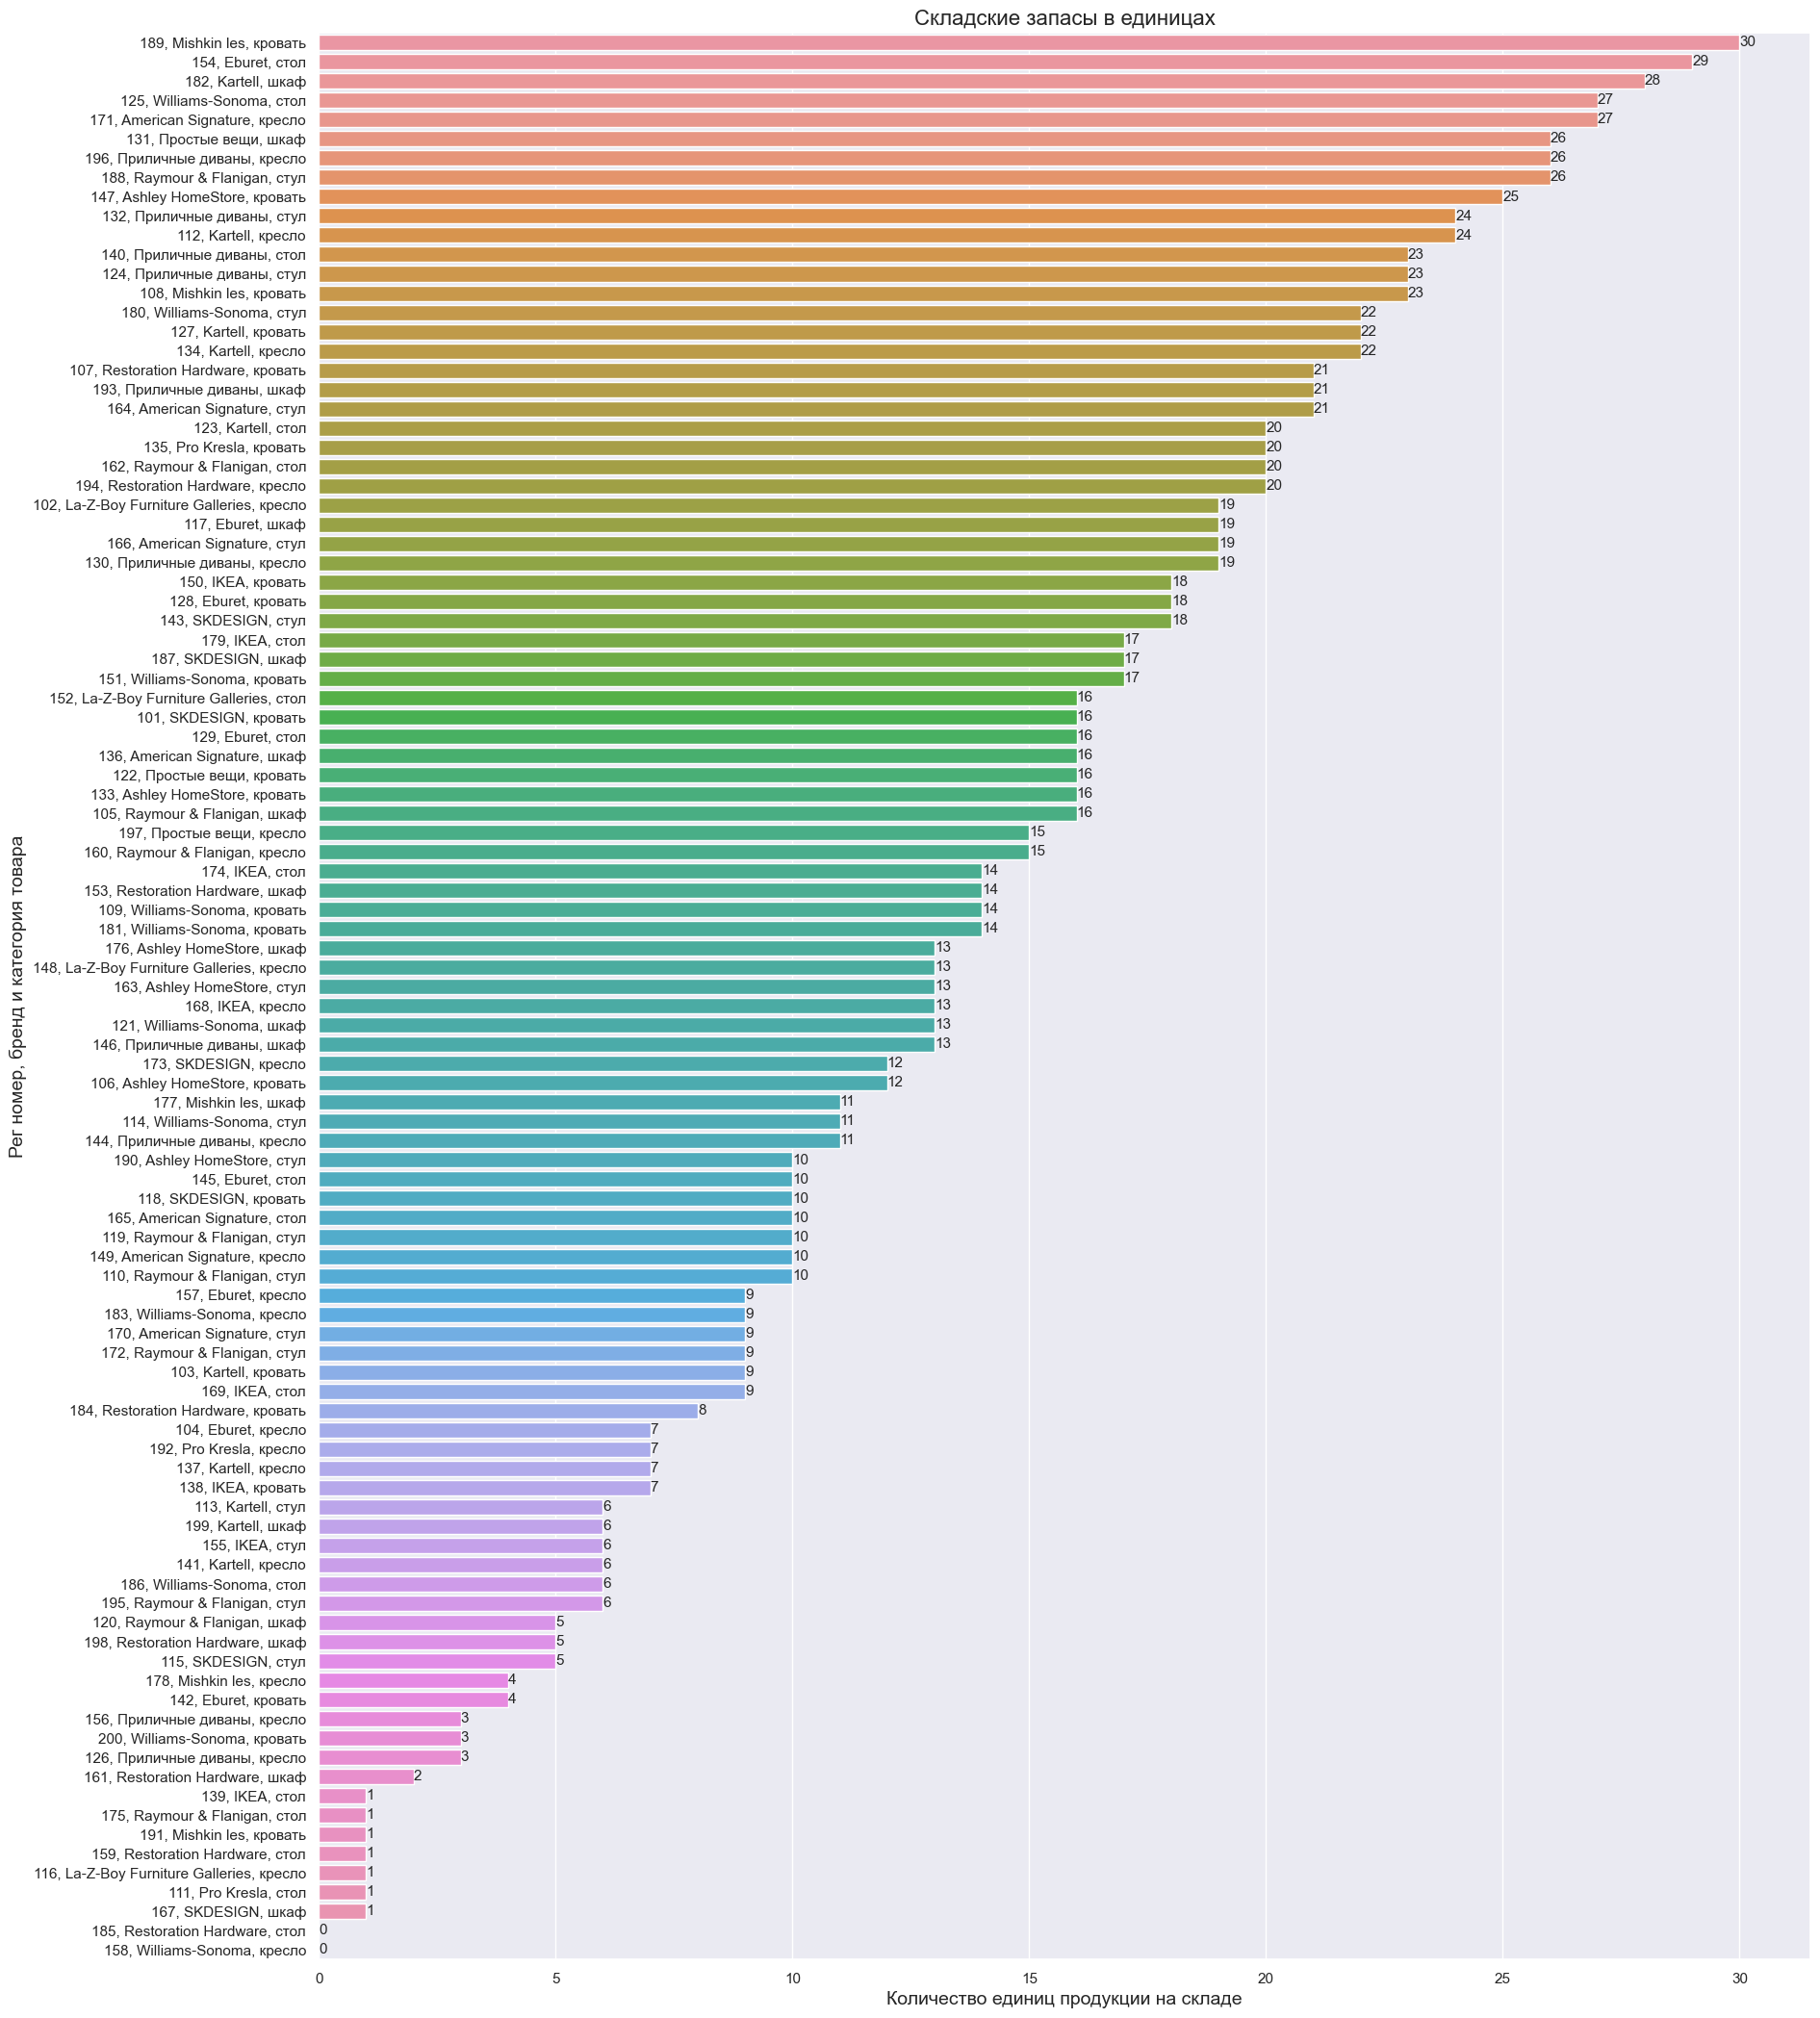

In [118]:
sns.set(rc={'figure.figsize':(20, 26)})

ax = sns.barplot(quantity_group, 
                 x = 'quantity', 
                 y = 'reg_number', 
                 orient = 'h',
                 order = quantity_group.sort_values('quantity', ascending=False)['reg_number'])

ax.bar_label(ax.containers[0], size = 11)

plt.title('Складские запасы в единицах', size = 16)
plt.xlabel('Количество единиц продукции на складе', size = 14)
plt.ylabel('Рег номер, бренд и категория товара', size = 14)

ax.set_yticklabels([f'{i}, {r}, {s}' for i,r, s in zip(quantity_group['reg_number'], 
                                                       quantity_group['brand_name'], 
                                                       quantity_group['category_name'])])

In [119]:
# посмотрим на складские запасы по каждому товару в денежном выражении

In [120]:
quantity_in_dollars = sql_df_2[['reg_number','brand_name', 'category_name', 'quantity_in_dollars']].sort_values('quantity_in_dollars', ascending=False).reset_index(drop= True)
quantity_in_dollars

,reg_number,brand_name,category_name,quantity_in_dollars
0,196,Приличные диваны,кресло,24327.68
1,188,Raymour & Flanigan,стул,23852.40
2,132,Приличные диваны,стул,22618.80
3,171,American Signature,кресло,22341.69
4,154,Eburet,стол,20527.94
...,...,...,...,...
95,161,Restoration Hardware,шкаф,679.70
96,191,Mishkin les,кровать,634.44
97,111,Pro Kresla,стол,557.60
98,185,Restoration Hardware,стол,0.00


[Text(0, 0, '196, Приличные диваны, кресло'),
 Text(0, 1, '188, Raymour & Flanigan, стул'),
 Text(0, 2, '132, Приличные диваны, стул'),
 Text(0, 3, '171, American Signature, кресло'),
 Text(0, 4, '154, Eburet, стол'),
 Text(0, 5, '125, Williams-Sonoma, стол'),
 Text(0, 6, '123, Kartell, стол'),
 Text(0, 7, '166, American Signature, стул'),
 Text(0, 8, '108, Mishkin les, кровать'),
 Text(0, 9, '117, Eburet, шкаф'),
 Text(0, 10, '194, Restoration Hardware, кресло'),
 Text(0, 11, '107, Restoration Hardware, кровать'),
 Text(0, 12, '182, Kartell, шкаф'),
 Text(0, 13, '150, IKEA, кровать'),
 Text(0, 14, '152, La-Z-Boy Furniture Galleries, стол'),
 Text(0, 15, '179, IKEA, стол'),
 Text(0, 16, '140, Приличные диваны, стол'),
 Text(0, 17, '124, Приличные диваны, стул'),
 Text(0, 18, '187, SKDESIGN, шкаф'),
 Text(0, 19, '105, Raymour & Flanigan, шкаф'),
 Text(0, 20, '180, Williams-Sonoma, стул'),
 Text(0, 21, '143, SKDESIGN, стул'),
 Text(0, 22, '193, Приличные диваны, шкаф'),
 Text(0, 23, '197

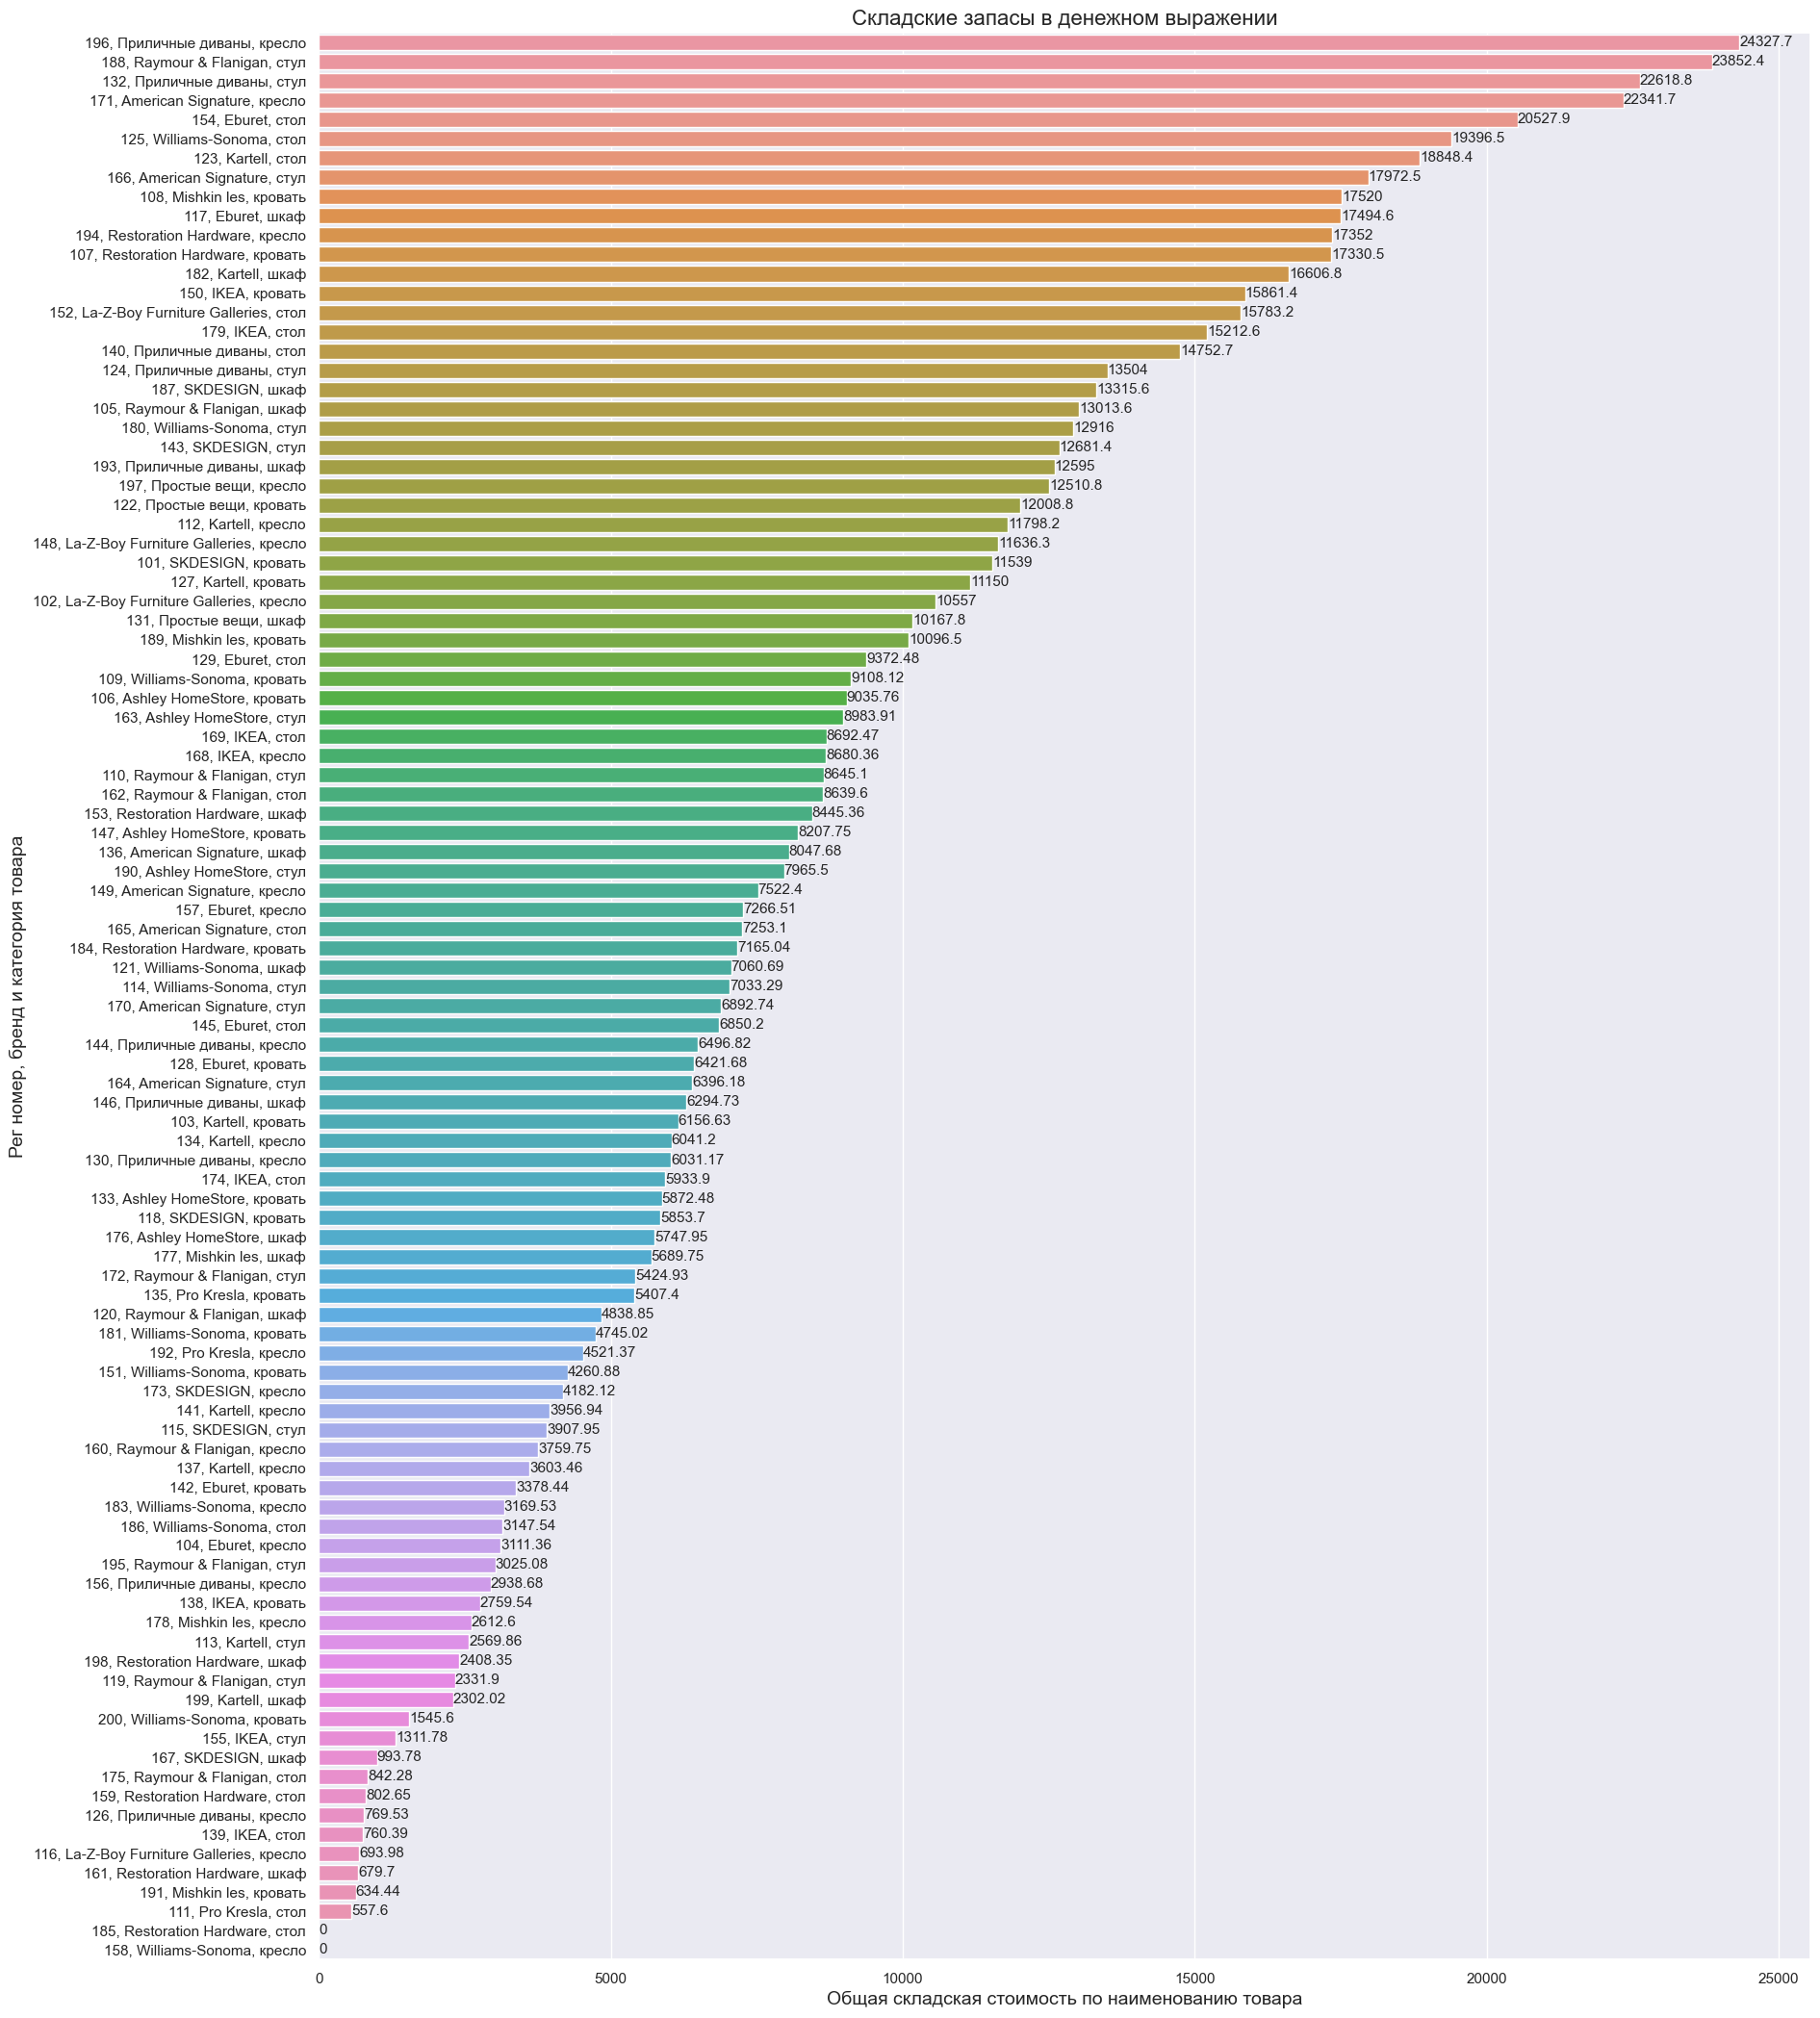

In [121]:
sns.set(rc={'figure.figsize':(20, 26)})

ax = sns.barplot(quantity_in_dollars, 
                 x = 'quantity_in_dollars', 
                 y = 'reg_number', 
                 orient = 'h',
                 order = quantity_in_dollars.sort_values('quantity_in_dollars', ascending=False)['reg_number'])

ax.bar_label(ax.containers[0], size = 11)

plt.title('Складские запасы в денежном выражении', size = 16)
plt.xlabel('Общая складская стоимость по наименованию товара', size = 14)
plt.ylabel('Рег номер, бренд и категория товара', size = 14)

ax.set_yticklabels([f'{i}, {r}, {s}' for i,r, s in zip(quantity_in_dollars['reg_number'], 
                                                       quantity_in_dollars['brand_name'], 
                                                       quantity_in_dollars['category_name'])])

In [122]:
# сделаем запрос из четырёх таблиц

In [123]:
sql_request_3 = """
SELECT 
orders.reg_number, 
products.brand_name, 
products.price, 
categories.category_number, 
categories.category_name, 
categories.category_info, 
orders.customer_number, 
customers.customer_data, 
customers.age, 
customers.email, 
customers.rating, 
orders.date_of_order, 
orders.delivery 
FROM orders
LEFT JOIN products ON orders.reg_number = products.reg_number
LEFT JOIN categories ON products.category_number = categories.category_number
LEFT JOIN customers ON orders.customer_number = customers.customer_number;
"""

In [124]:
cursor.execute(sql_request_3)

In [125]:
# сделаем ДФ по продажам с множеством данных

In [126]:
sql_df_3 = pd.DataFrame(cursor.fetchall(), columns = ['reg_number', 
                                                      'brand_name',
                                                      'price',
                                                      'category_number', 
                                                      'category_name', 
                                                      'category_info', 
                                                      'customer_number', 
                                                      'customer_data', 
                                                      'age', 
                                                      'email', 
                                                      'rating', 
                                                      'date_of_order', 
                                                      'delivery'                                                       
                                                      ])

In [127]:
sql_df_3

,reg_number,brand_name,price,category_number,category_name,category_info,customer_number,customer_data,age,email,rating,date_of_order,delivery
0,172,Raymour & Flanigan,602.77,2,стул,"предмет мебели для сидения одного человека, с ...",34,Alejandro Hamilton,72,Alejandro_Hamilton@fastmail.com,3.2,2020-07-21 02:06:23,0
1,123,Kartell,942.42,1,стол,"предмет мебели, имеющий приподнятую горизонтал...",38,Olive Burwood,61,Olive_Burwood@fastmail.com,3.7,2022-11-27 04:03:19,0
2,169,IKEA,965.83,1,стол,"предмет мебели, имеющий приподнятую горизонтал...",63,Dominique Smith,42,Dominique_Smith@gmail.com,0.4,2021-09-08 08:34:54,1
3,135,Pro Kresla,270.37,5,кровать,"предмет мебели, предназначенный для сна в поло...",66,Charlotte Martin,75,Charlotte_Martin@live.com,4.3,2022-09-20 16:53:22,0
4,176,Ashley HomeStore,442.15,3,шкаф,мебельное изделие для хранения предметов разли...,37,Lillian Mellish,70,Lillian_Mellish@gmail.com,2.2,2022-03-25 00:52:44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,121,Williams-Sonoma,543.13,3,шкаф,мебельное изделие для хранения предметов разли...,44,Peter Wolfrom,55,Peter_Wolfrom@fastmail.com,4.5,2021-05-17 13:55:03,1
99996,188,Raymour & Flanigan,917.40,2,стул,"предмет мебели для сидения одного человека, с ...",45,Lesley Fisher,78,Lesley_Fisher@live.com,2.5,2021-07-21 08:35:40,0
99997,114,Williams-Sonoma,639.39,2,стул,"предмет мебели для сидения одного человека, с ...",9,Odis Curran,36,Odis_Curran@yahoo.com,1.7,2021-11-27 02:32:58,1
99998,149,American Signature,752.24,4,кресло,предмет мебели для комфортного продолжительног...,33,Jeremy Pullen,34,Jeremy_Pullen@fastmail.com,4.6,2021-06-19 13:11:34,0


In [128]:
# давайте посмотрим на средний чек

In [129]:
sql_df_3['price'].mean()

618.5950043

In [130]:
# посмотрим на средние чеки по бренду

In [131]:
brand_name_mean = sql_df_3.groupby('brand_name')['price'].mean().to_frame().sort_values('price', ascending=False)
brand_name_mean

,price
brand_name,
La-Z-Boy Furniture Galleries,785.406369
SKDESIGN,704.622749
American Signature,687.937717
Eburet,666.255592
Простые вещи,658.472497
IKEA,651.675127
Raymour & Flanigan,640.045833
Приличные диваны,633.848617
Restoration Hardware,633.549059


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'La-Z-Boy Furniture Galleries'),
  Text(1, 0, 'SKDESIGN'),
  Text(2, 0, 'American Signature'),
  Text(3, 0, 'Eburet'),
  Text(4, 0, 'Простые вещи'),
  Text(5, 0, 'IKEA'),
  Text(6, 0, 'Raymour & Flanigan'),
  Text(7, 0, 'Приличные диваны'),
  Text(8, 0, 'Restoration Hardware'),
  Text(9, 0, 'Mishkin les'),
  Text(10, 0, 'Ashley HomeStore'),
  Text(11, 0, 'Kartell'),
  Text(12, 0, 'Pro Kresla'),
  Text(13, 0, 'Williams-Sonoma')])

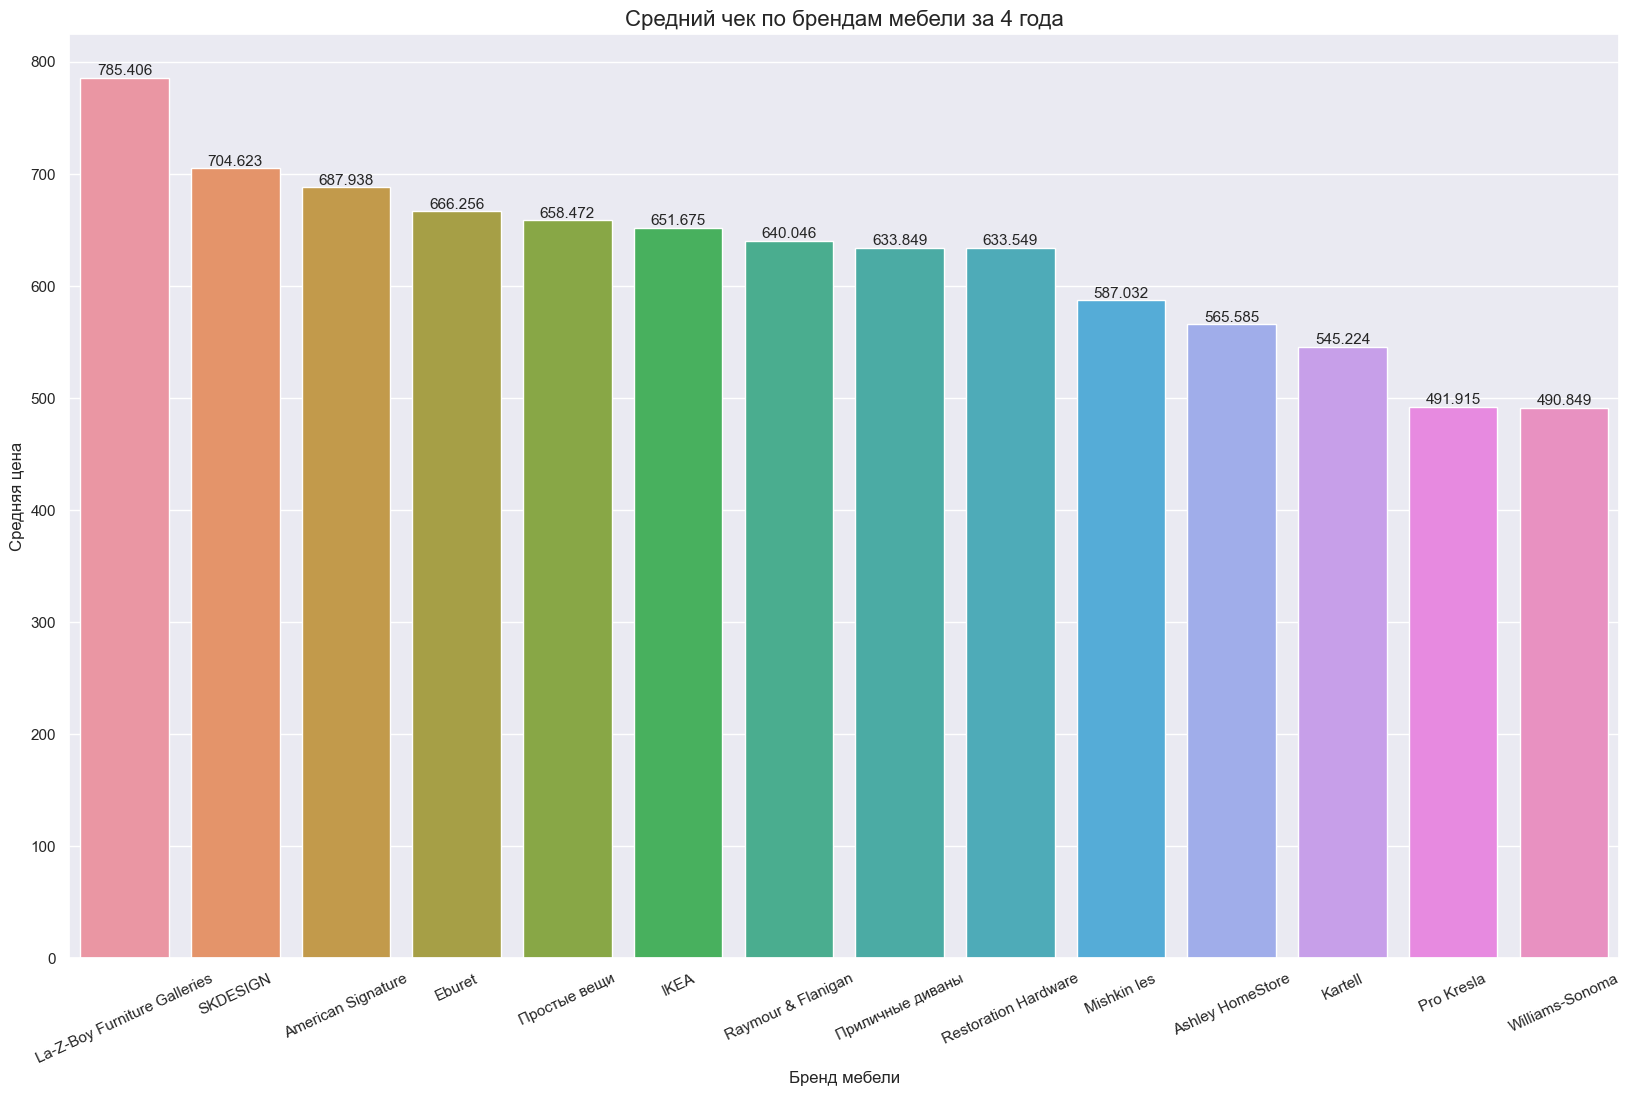

In [132]:
sns.set(rc={'figure.figsize':(20, 12)})

ax = sns.barplot(brand_name_mean, 
                 x = brand_name_mean.index, 
                 y = 'price')

ax.bar_label(ax.containers[0], size = 11)

plt.title('Средний чек по брендам мебели за 4 года', size = 16)
plt.xlabel('Бренд мебели')
plt.ylabel('Средняя цена')
plt.xticks(rotation = 25)

In [133]:
# посмотрим на средние чеки по категории мебели

In [134]:
category_name_mean = sql_df_3.groupby('category_name')['price'].mean().to_frame().sort_values('price', ascending=False)
category_name_mean

,price
category_name,
стол,692.402483
стул,637.105431
шкаф,607.410331
кресло,595.181429
кровать,576.702413


Text(0, 0.5, 'Средняя цена')

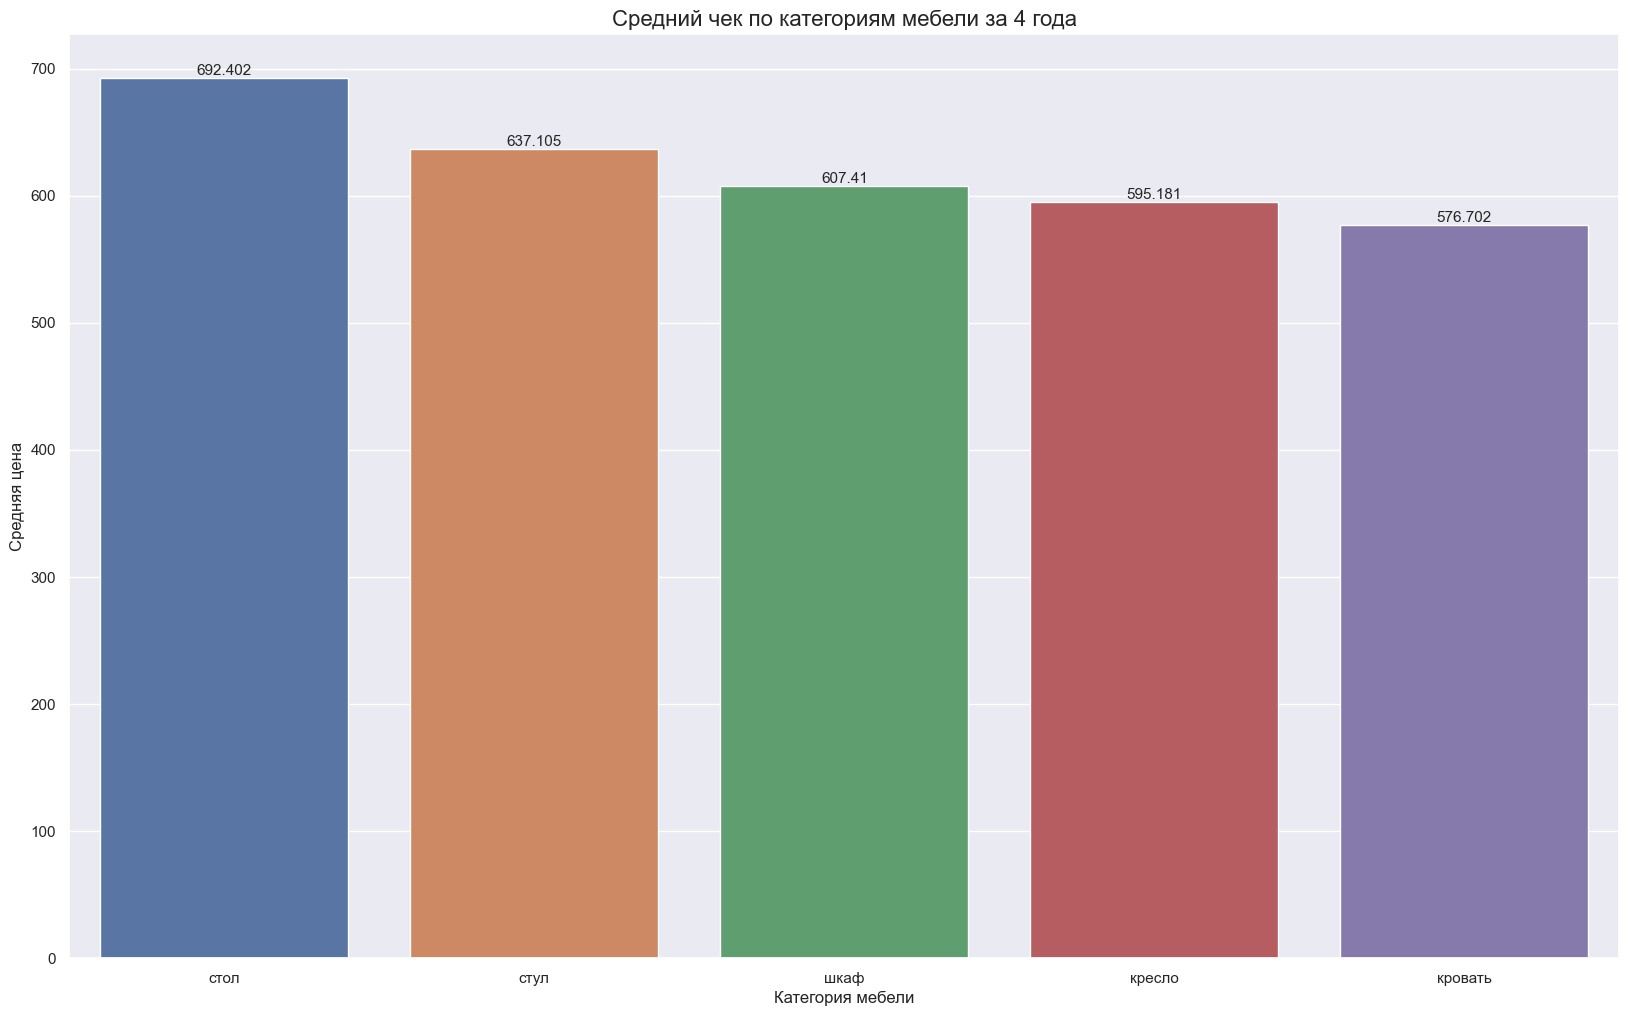

In [135]:
sns.set(rc={'figure.figsize':(20, 12)})

ax = sns.barplot(category_name_mean, 
                 x = category_name_mean.index, 
                 y = 'price')

ax.bar_label(ax.containers[0], size = 11)

plt.title('Средний чек по категориям мебели за 4 года', size = 16)
plt.xlabel('Категория мебели')
plt.ylabel('Средняя цена')

In [136]:
# посмотрим на доходы нашего магазина в разрезе каждого года

# подготовим 4 ДФа, в которых даты будут в виде месячных интервалов

In [137]:
year_1 = sql_df_3[(sql_df_3['date_of_order'] >= '2020-01-01') & (sql_df_3['date_of_order'] <= '2020-12-31')]
year_1['date_of_order'] = pd.to_datetime(year_1['date_of_order'])   
year_1['date_of_order'] = year_1['date_of_order'].dt.to_period('M')
year_1 = year_1.groupby('date_of_order')['price'].sum().to_frame()
year_1

C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\2902388077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1['date_of_order'] = pd.to_datetime(year_1['date_of_order'])
C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\2902388077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1['date_of_order'] = year_1['date_of_order'].dt.to_period('M')


,price
date_of_order,
2020-01,1328563.29
2020-02,1212598.33
2020-03,1317620.62
2020-04,1261280.67
2020-05,1320106.37
2020-06,1311482.45
2020-07,1264901.07
2020-08,1314490.96
2020-09,1279839.46


In [138]:
year_2 = sql_df_3[(sql_df_3['date_of_order'] >= '2021-01-01') & (sql_df_3['date_of_order'] <= '2021-12-31')]
year_2['date_of_order'] = pd.to_datetime(year_2['date_of_order'])   
year_2['date_of_order'] = year_2['date_of_order'].dt.to_period('M')
year_2 = year_2.groupby('date_of_order')['price'].sum().to_frame()
year_2

C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\69566490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2['date_of_order'] = pd.to_datetime(year_2['date_of_order'])
C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\69566490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2['date_of_order'] = year_2['date_of_order'].dt.to_period('M')


,price
date_of_order,
2021-01,1307268.69
2021-02,1121902.22
2021-03,1372050.78
2021-04,1306244.35
2021-05,1351964.64
2021-06,1223907.59
2021-07,1314720.63
2021-08,1356589.40
2021-09,1246291.92


In [139]:
year_3 = sql_df_3[(sql_df_3['date_of_order'] >= '2022-01-01') & (sql_df_3['date_of_order'] <= '2022-12-31')]
year_3['date_of_order'] = pd.to_datetime(year_3['date_of_order'])   
year_3['date_of_order'] = year_3['date_of_order'].dt.to_period('M')
year_3 = year_3.groupby('date_of_order')['price'].sum().to_frame()
year_3

C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\3730166215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_3['date_of_order'] = pd.to_datetime(year_3['date_of_order'])
C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\3730166215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_3['date_of_order'] = year_3['date_of_order'].dt.to_period('M')


,price
date_of_order,
2022-01,1325397.90
2022-02,1197429.25
2022-03,1317339.33
2022-04,1243858.25
2022-05,1271360.57
2022-06,1256184.87
2022-07,1333404.87
2022-08,1276186.89
2022-09,1263701.88


In [140]:
year_4 = sql_df_3[(sql_df_3['date_of_order'] >= '2023-01-01') & (sql_df_3['date_of_order'] <= '2023-12-31')]
year_4['date_of_order'] = pd.to_datetime(year_4['date_of_order'])   
year_4['date_of_order'] = year_4['date_of_order'].dt.to_period('M')
year_4 = year_4.groupby('date_of_order')['price'].sum().to_frame()
year_4

C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\2986344326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_4['date_of_order'] = pd.to_datetime(year_4['date_of_order'])
C:\Users\vladi\AppData\Local\Temp\ipykernel_5100\2986344326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_4['date_of_order'] = year_4['date_of_order'].dt.to_period('M')


,price
date_of_order,
2023-01,1367387.98
2023-02,1189239.85
2023-03,1278640.87
2023-04,1255609.16
2023-05,1313896.14
2023-06,1316217.53
2023-07,1270831.30
2023-08,1338002.98
2023-09,1258488.45


In [141]:
# давайте построим 4 графика на одном холсте
# на них будет вся выручка в разрезе каждого года по месяцам

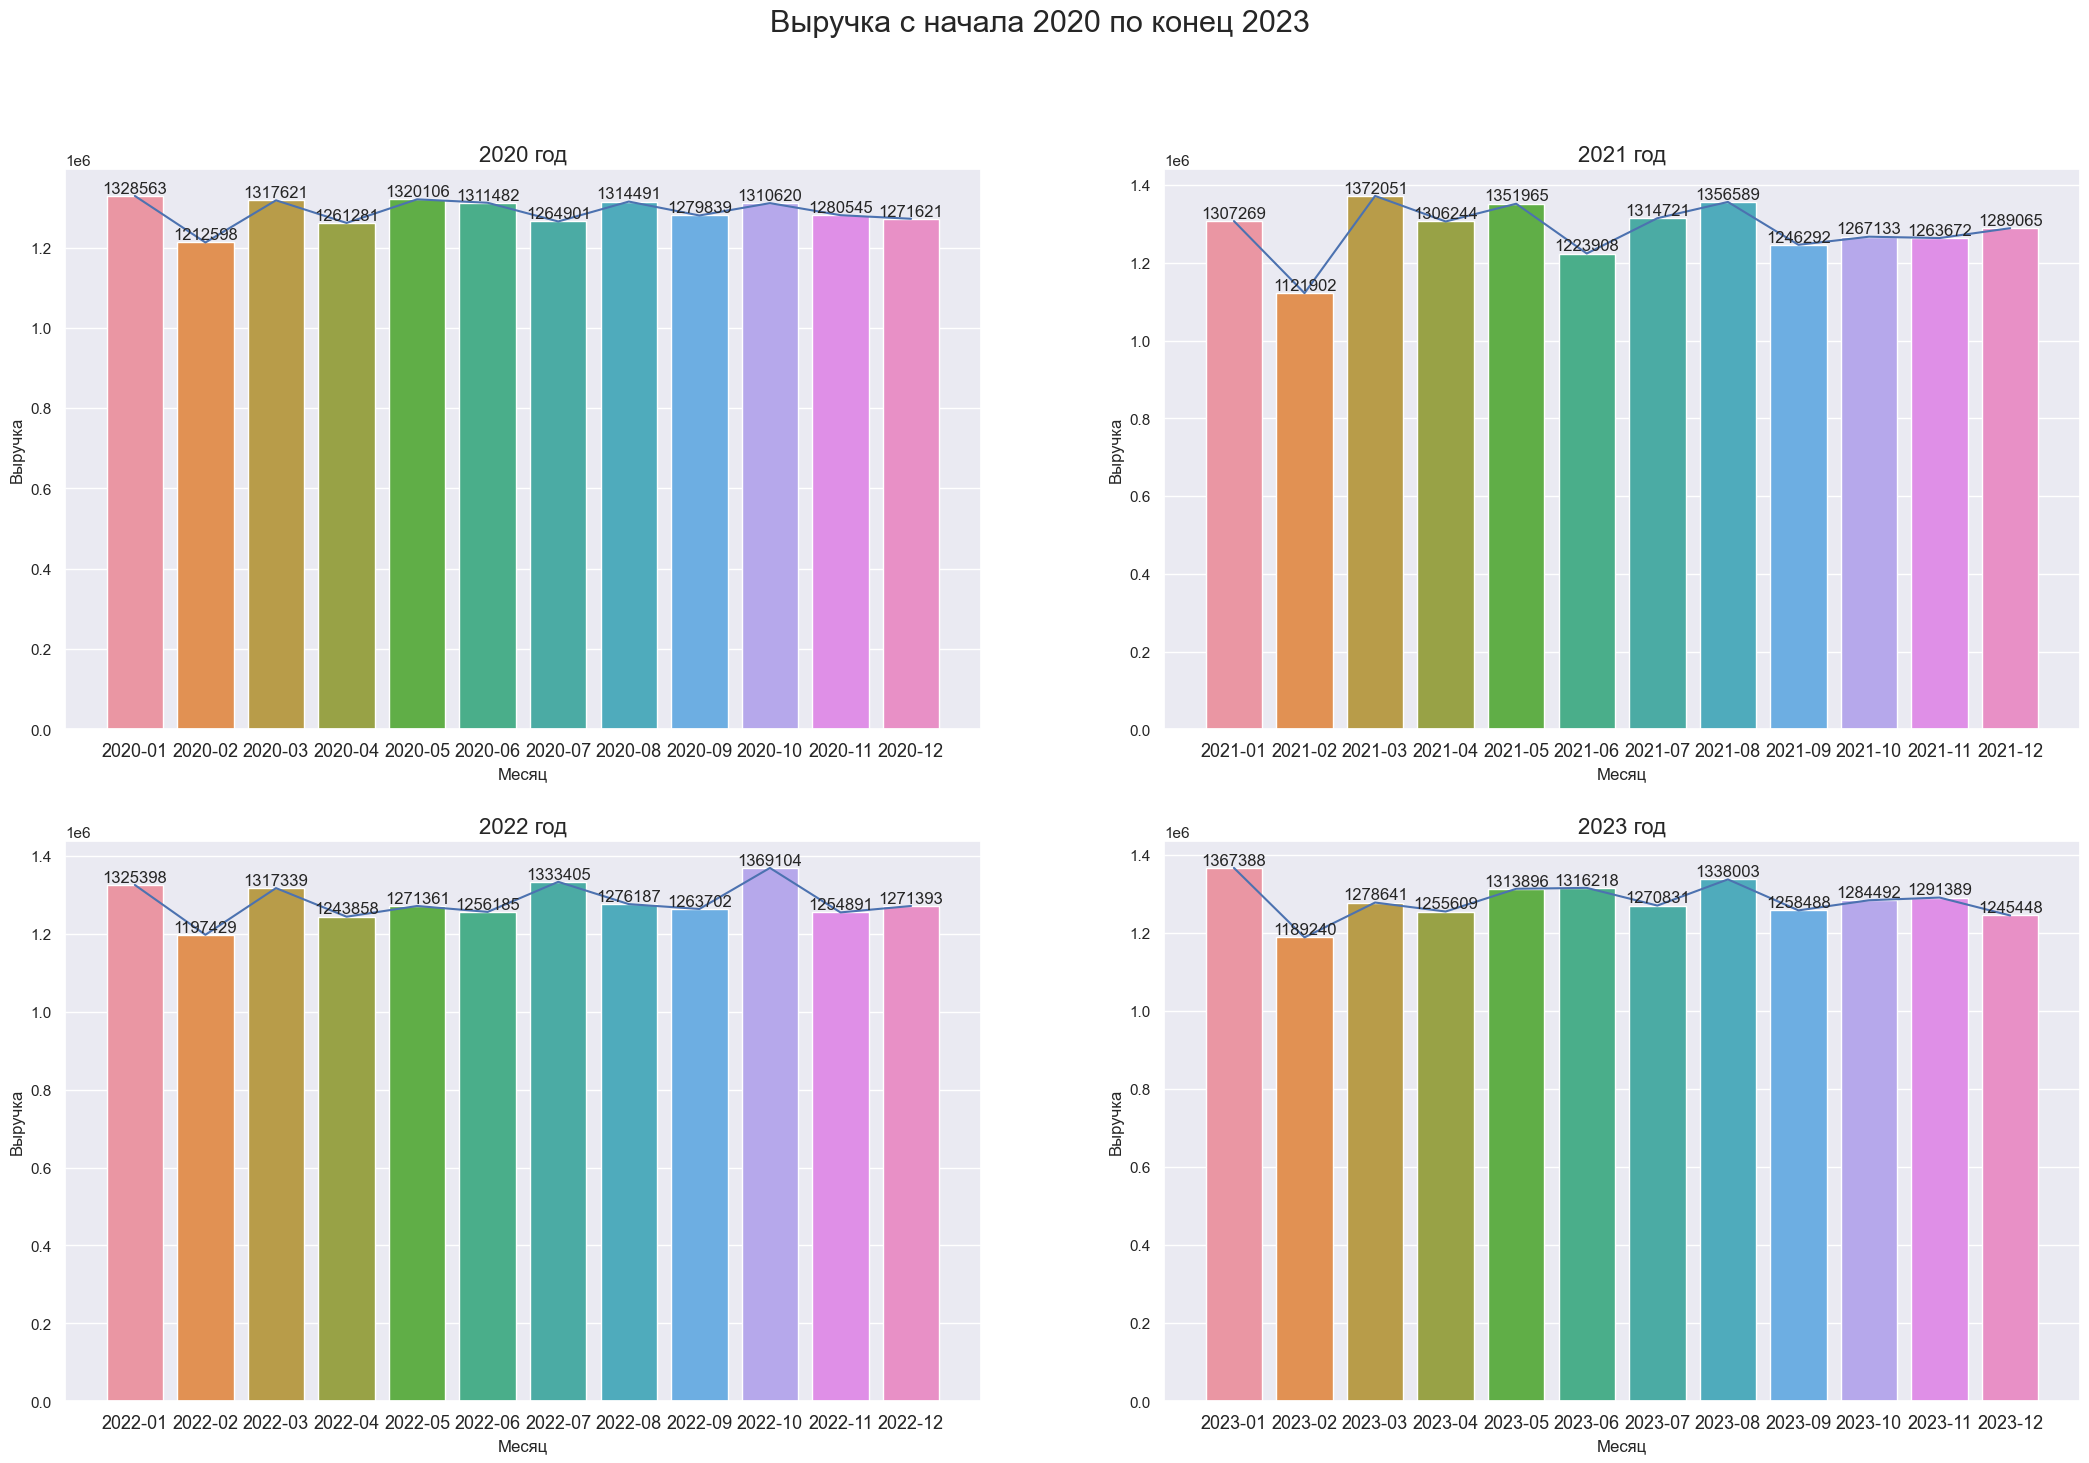

In [142]:
fig, axes = plt.subplots(2,2, figsize = (26, 16))

sns.barplot(year_1, x = year_1.index, y = 'price', ax = axes[0,0])
sns.lineplot(year_1, x = range(0,12), y = 'price', ax = axes[0,0])
sns.barplot(year_2, x = year_2.index, y = 'price', ax = axes[0,1])
sns.lineplot(year_2, x = range(0,12), y = 'price', ax = axes[0,1])
sns.barplot(year_3, x = year_3.index, y = 'price', ax = axes[1,0])
sns.lineplot(year_3, x = range(0,12), y = 'price', ax = axes[1,0])
sns.barplot(year_4, x = year_4.index, y = 'price', ax = axes[1,1])
sns.lineplot(year_4, x = range(0,12), y = 'price', ax = axes[1,1])

axes[0,0].set_title('2020 год', size = 16)
axes[0,0].set(xlabel = 'Месяц', ylabel = 'Выручка')
axes[0,0].set_xticklabels(year_1.index, fontsize=13)
axes[0,0].bar_label(axes[0,0].containers[0], 
                    labels=[f'{x.get_height():.0f}' for x in axes[0,0].containers[0]], 
                    size = 12)

axes[0,1].set_title('2021 год', size = 16)
axes[0,1].set(xlabel = 'Месяц', ylabel = 'Выручка')
axes[0,1].set_xticklabels(year_2.index, fontsize=13)
axes[0,1].bar_label(axes[0,1].containers[0], 
                    labels=[f'{x.get_height():.0f}' for x in axes[0,1].containers[0]], 
                    size = 12)

axes[1,0].set_title('2022 год', size = 16)
axes[1,0].set(xlabel = 'Месяц', ylabel = 'Выручка')
axes[1,0].set_xticklabels(year_3.index, fontsize=13)
axes[1,0].bar_label(axes[1,0].containers[0], 
                    labels=[f'{x.get_height():.0f}' for x in axes[1,0].containers[0]], 
                    size = 12)

axes[1,1].set_title('2023 год', size = 16)
axes[1,1].set(xlabel = 'Месяц', ylabel = 'Выручка')
axes[1,1].set_xticklabels(year_4.index, fontsize=13)
axes[1,1].bar_label(axes[1,1].containers[0], 
                    labels=[f'{x.get_height():.0f}' for x in axes[1,1].containers[0]], 
                    size = 12)

plt.suptitle ('Выручка с начала 2020 по конец 2023', size = 22)

plt.show()

In [143]:
# давайте посмотрим немного на пользователей
# узнаем их минимальный, максимальный и средний возраст и рейтинг

In [144]:
round(sql_df_3['age'].mean(),2)

59.19

In [145]:
customer_data_age = sql_df_3.groupby('customer_data')['age'].max().to_frame().sort_values('age', ascending=False)
customer_data_age

,age
customer_data,
Kenneth Hahn,99
Edward Wyland,98
Richard Lapierre,96
Tammy Korsmeyer,96
Pamela Cantu,94
...,...
Stephanie Isenhart,22
Dean Steib,20
Edna Messenger,20


Text(0, 0.5, 'Пользователь')

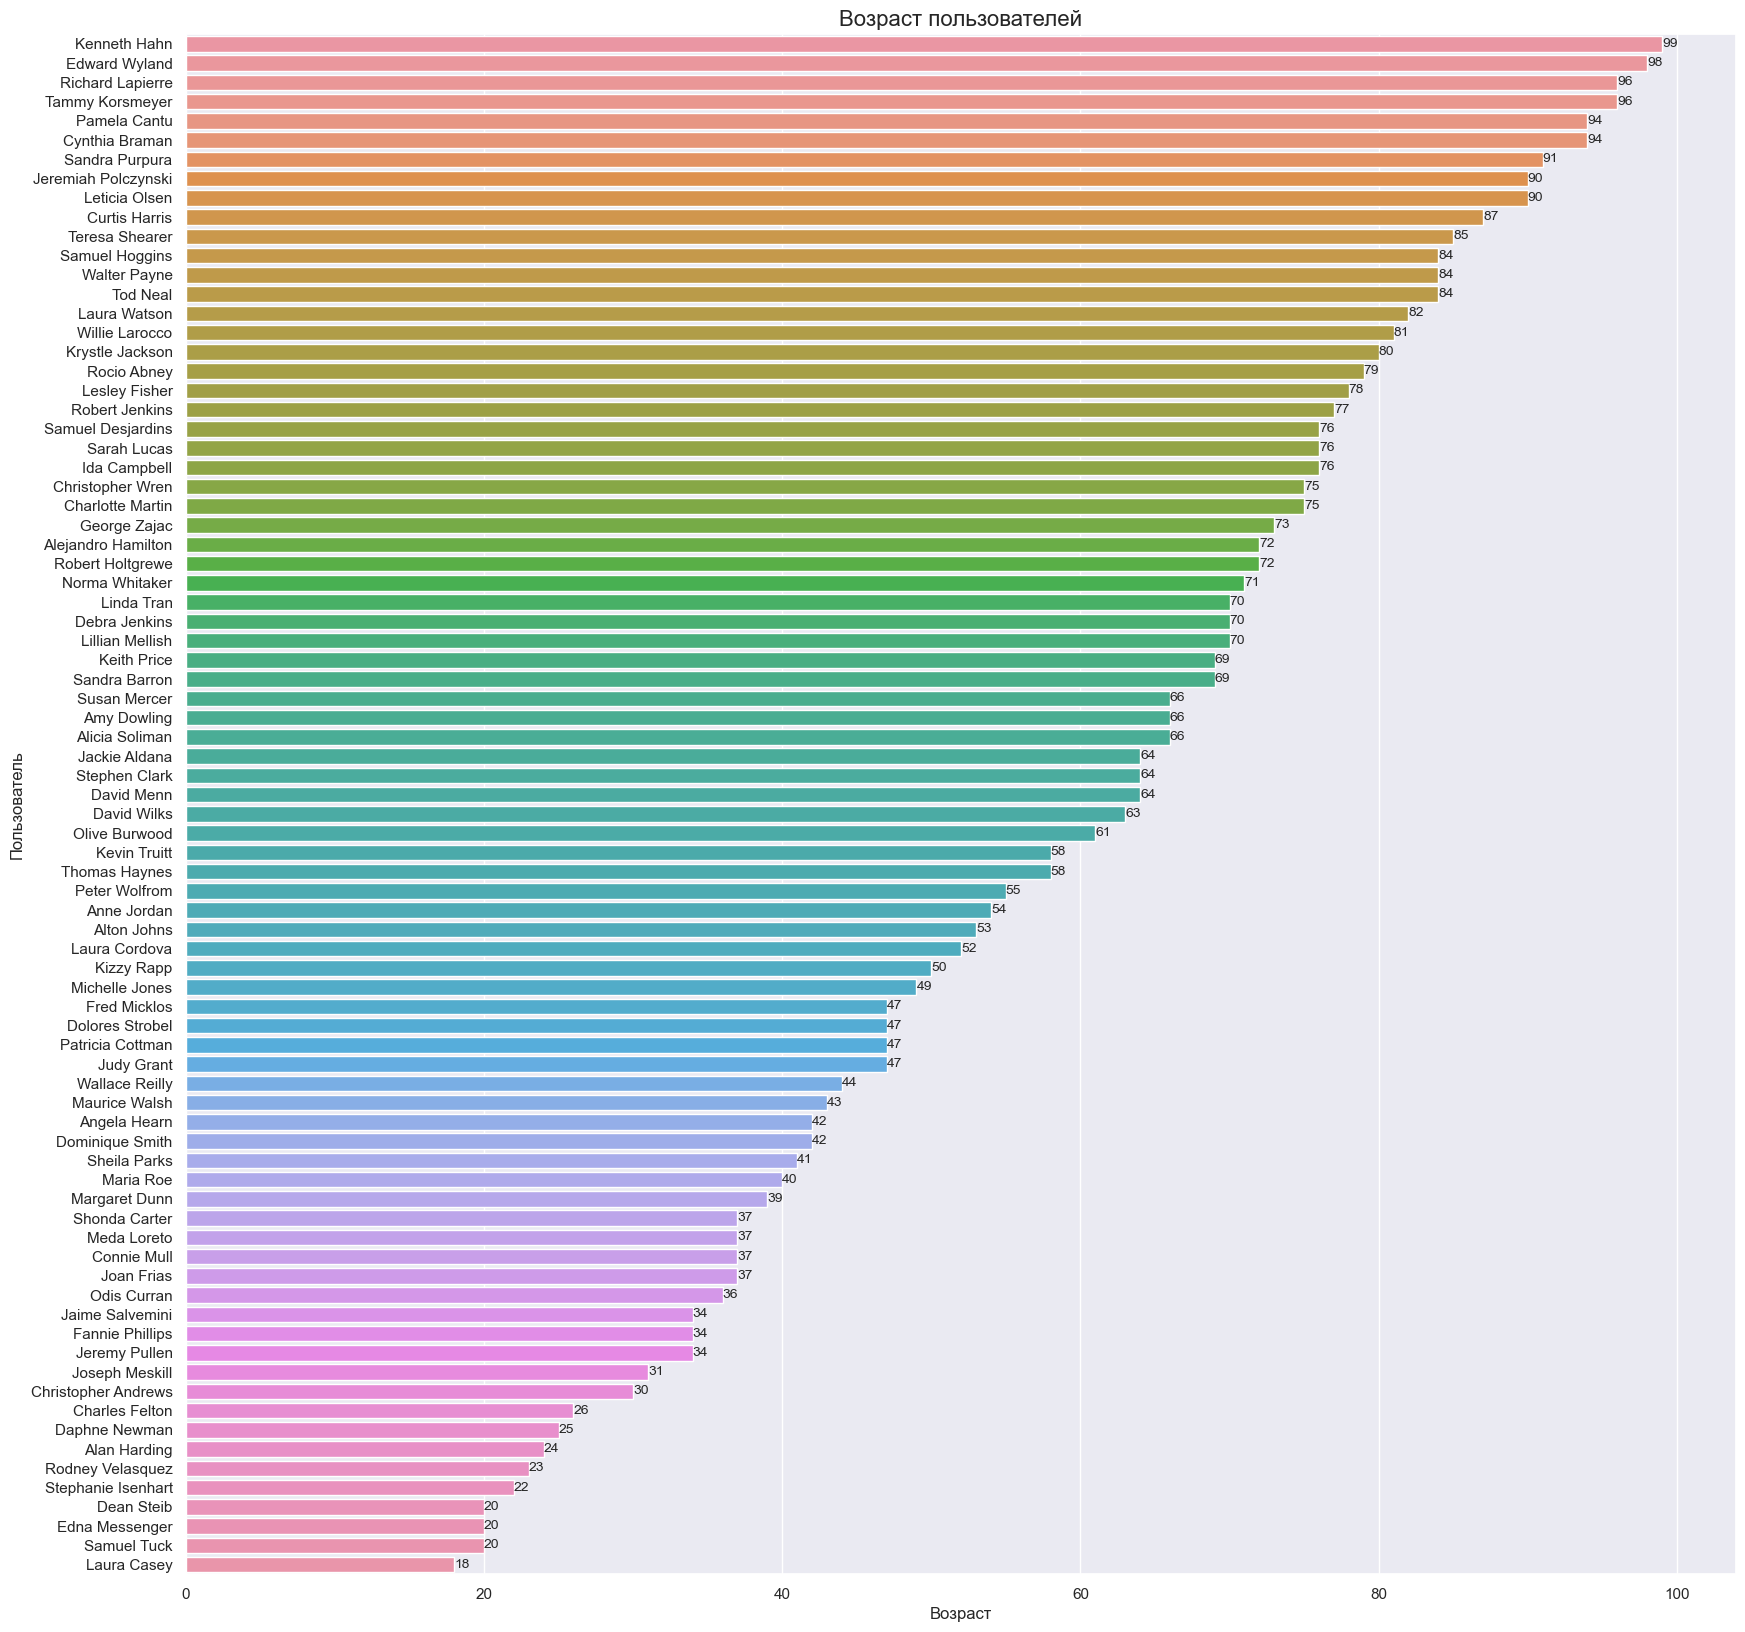

In [146]:
sns.set(rc={'figure.figsize':(20, 20)})

ax = sns.barplot(customer_data_age, 
                 x = 'age', 
                 y = customer_data_age.index, 
                 orient = 'h')

ax.bar_label(ax.containers[0], size = 10)

plt.title('Возраст пользователей', size = 16)
plt.xlabel('Возраст')
plt.ylabel('Пользователь')

In [147]:
# переходим к рейтингам
# посмотрим на минимальный, максимальный и средний

In [148]:
round(sql_df_3['rating'].agg(['min','max','mean']), 2)

min     0.00
max     5.00
mean    2.58
Name: rating, dtype: float64

In [149]:
# посмотрим на рейтинги пользователей глобально

In [150]:
customer_data_rating = sql_df_3.groupby('customer_data')['rating'].max().to_frame().sort_values('rating', ascending=False)
customer_data_rating

,rating
customer_data,
Pamela Cantu,5.0
Sandra Purpura,4.9
Jeremy Pullen,4.6
Robert Jenkins,4.6
Sandra Barron,4.6
...,...
Edward Wyland,0.3
Sarah Lucas,0.2
Samuel Desjardins,0.2


Text(0, 0.5, 'Пользователь')

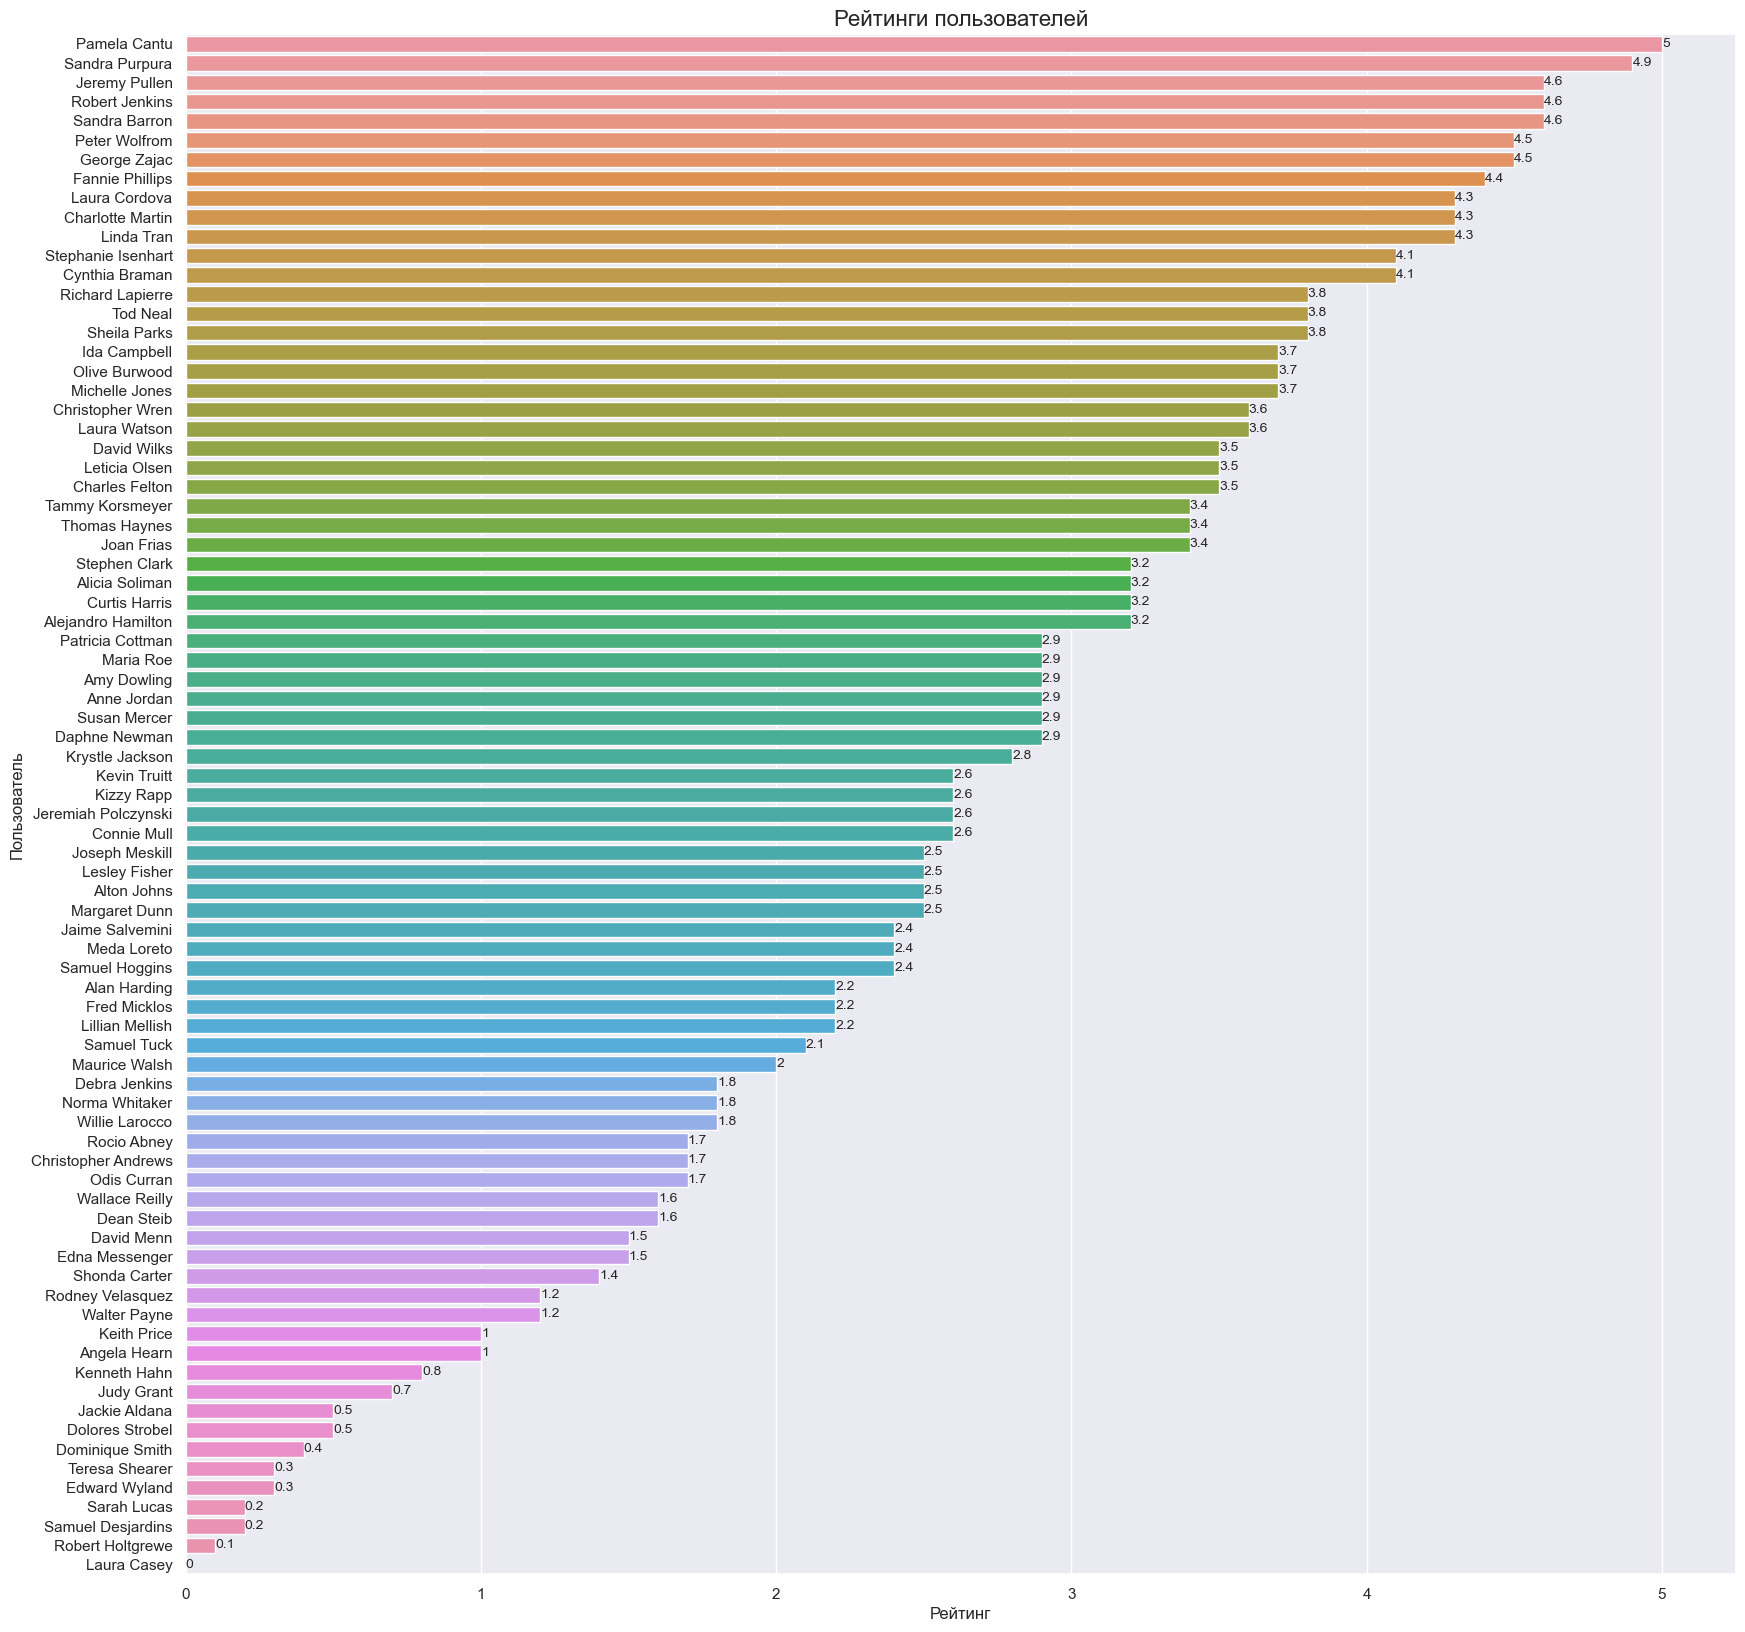

In [151]:
sns.set(rc={'figure.figsize':(20, 20)})

ax = sns.barplot(customer_data_rating, 
                 x = 'rating', 
                 y = customer_data_rating.index, 
                 orient = 'h')

ax.bar_label(ax.containers[0], size = 10)

plt.title('Рейтинги пользователей', size = 16)
plt.xlabel('Рейтинг')
plt.ylabel('Пользователь')

In [152]:
# посмотрим сколько потратил денег в нашем магазине каждый из пользователей

In [153]:
income = sql_df_3.groupby('customer_data')['price'].sum().to_frame().sort_values('price', ascending=False)
income

,price
customer_data,
Lillian Mellish,828498.18
George Zajac,827630.02
Kenneth Hahn,827148.63
Michelle Jones,817117.17
Jeremy Pullen,815353.98
...,...
Ida Campbell,732988.58
Jaime Salvemini,725844.31
Samuel Tuck,723501.54


Text(0, 0.5, 'Пользователь')

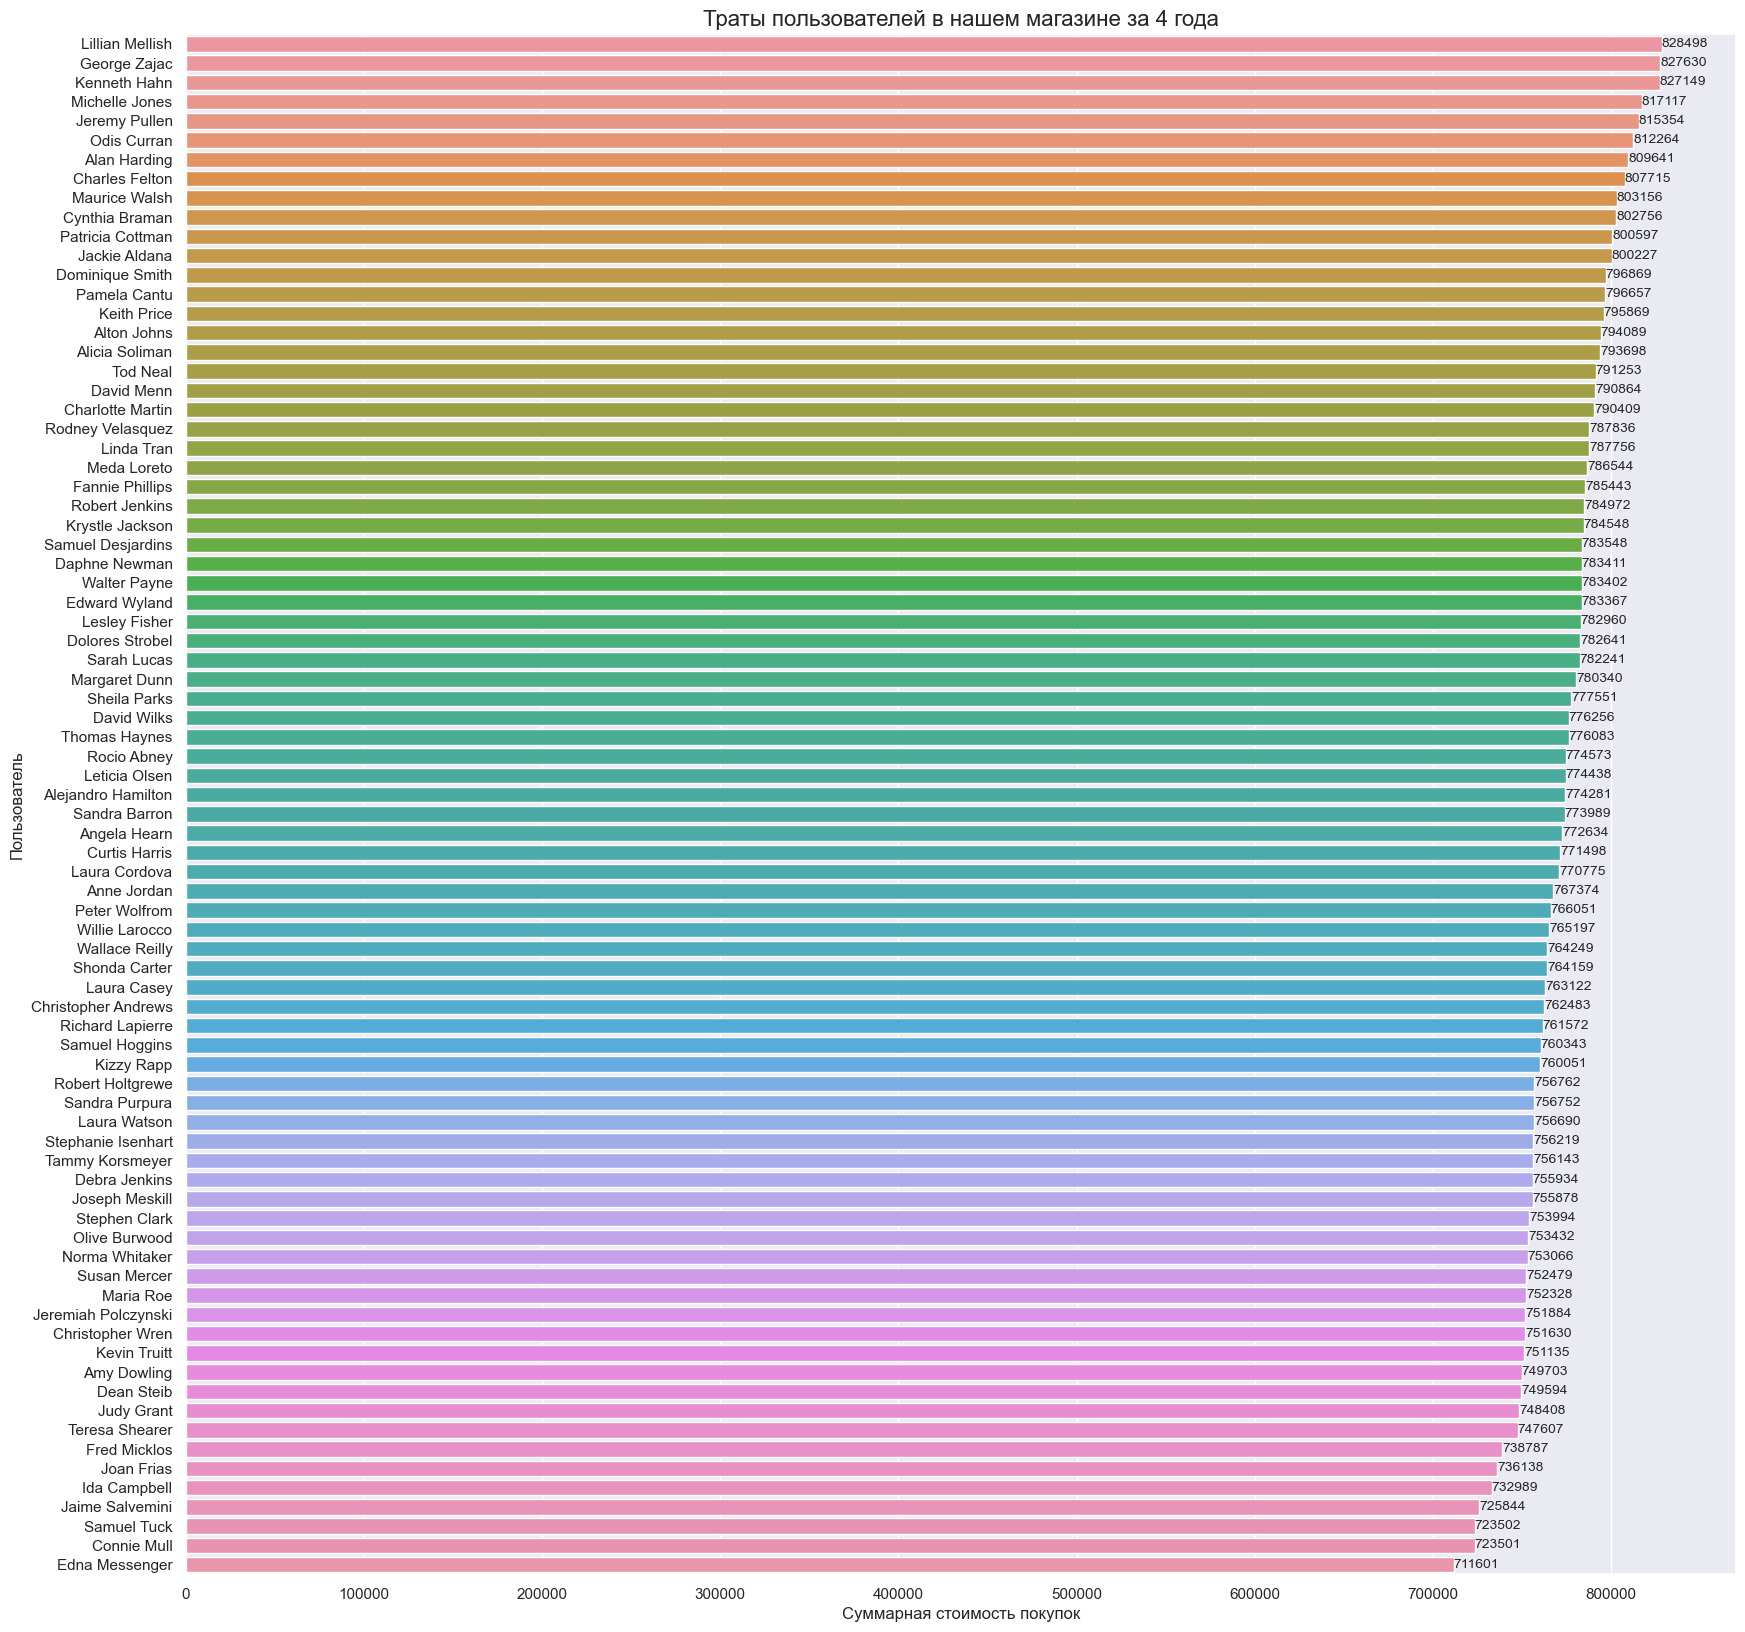

In [154]:
sns.set(rc={'figure.figsize':(20, 20)})

ax = sns.barplot(income, 
                 x = 'price', 
                 y = income.index, 
                 orient = 'h')

ax.bar_label(ax.containers[0], size = 10)

plt.title('Траты пользователей в нашем магазине за 4 года', size = 16)
plt.xlabel('Суммарная стоимость покупок')
plt.ylabel('Пользователь')

In [155]:
# закроем соединение с базой

In [156]:
conn.close()